# Telecom Churn Problem

## Table of Contents
* [Data Preprocessing](#data-preprocessing)
    * [Data Loading](#data-loading)
    * [Filter Out High-value Customers](#filter-customers)
    * [Define Target Variable (Churn)](#define-churn)
    * [Filter Out Single Unique Values](#filter-single)
    * [Missing Values](#missing-values)
    * [Derive Features](#derive-features)

<a class="anchor" id="data-preprocessing"></a> 

## Data Proprocessing

<a class="anchor" id="data-loading"></a> 

### Data Loading

In [138]:
import numpy as np
import pandas as pd

import datetime as dt

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline

from scipy.stats import norm
from scipy import stats

import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', -1)

rdn_seed = 0

In [2]:
telecom = pd.read_csv('telecom_churn_data.csv')
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rech_amt_6,last_day_rech_amt_7,last_day_rech_amt_8,last_day_rech_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,

In [3]:
telecom.shape

(99999, 226)

In [4]:
telecom.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7                    99999 non-null  float64
 11  arpu_8                    99999 non-null  float64
 12  arpu_9                    99999 non-null  float64
 13  onnet_mou_6               96062 non-null  float64
 14  onnet

In [5]:
telecom.rename(columns={'jun_vbc_3g': 'vbc_3g_6',
                          'jul_vbc_3g': 'vbc_3g_7',
                          'aug_vbc_3g': 'vbc_3g_8',
                          'sep_vbc_3g': 'vbc_3g_9'},
               inplace=True)

In [6]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rech_amt_6,last_day_rech_amt_7,last_day_rech_amt_8,last_day_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

<a class="anchor" id="filter-customers"></a>

### Filter Out High Value Customers

Normally, the revenue of a business is majorly from high-value customers. Let's check whether this telecom business satisfies this rule.

Calculate total charge amount.

In [7]:
telecom['total_data_rech_amt_6'] = telecom['total_rech_data_6'] * telecom['av_rech_amt_data_6']
telecom['total_data_rech_amt_7'] = telecom['total_rech_data_7'] * telecom['av_rech_amt_data_7']
telecom['total_data_rech_amt_8'] = telecom['total_rech_data_8'] * telecom['av_rech_amt_data_8']

In [8]:
telecom['total_amt_6'] = telecom[['total_rech_amt_6','total_data_rech_amt_6']].sum(axis=1)
telecom['total_amt_7'] = telecom[['total_rech_amt_7','total_data_rech_amt_7']].sum(axis=1)
telecom['total_amt_8'] = telecom[['total_rech_amt_8','total_data_rech_amt_8']].sum(axis=1)

High-value Customers Analysis: To see accumulative percentage of revenue from customers.

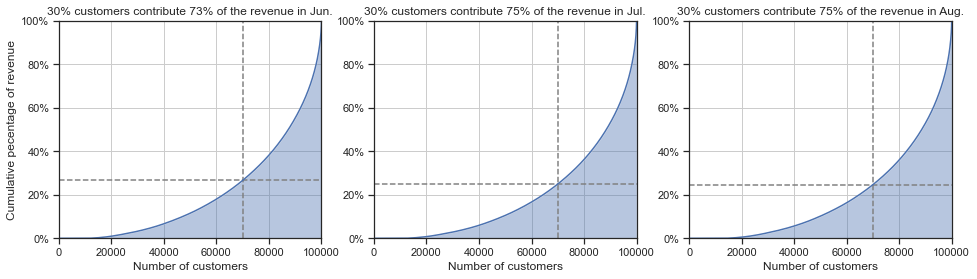

In [208]:
total_amt_cols = ['total_amt_6', 'total_amt_7', 'total_amt_8']
month_labels = ['Jun.', 'Jul.', 'Aug.']

fig, axes = plt.subplots(1, 3, sharex=True, figsize=(16,4))

for idx in range(len(total_amt_cols)):
    rev = telecom[total_amt_cols[idx]].sort_values().reset_index(drop=True)
    rev_pct = rev.cumsum()
    rev_pct /= rev_pct.iloc[-1]
    pct = rev_pct.quantile(0.7)
    
    axes[idx].plot(rev_pct)
    axes[idx].fill_between(rev_pct.index, rev_pct.values, alpha=0.4)
    axes[idx].vlines(x=70000, ymax=1, ymin=0, colors="gray", linestyles="--")
    axes[idx].hlines(y=pct, xmax=100000, xmin=0, colors="gray", linestyles="--")

    axes[idx].set_title('30% customers contribute {:.0%} of the revenue in {}'.format(1 - pct, month_labels[idx]))
    if idx == 0:
        axes[idx].set_ylabel('Cumulative pecentage of revenue')
    axes[idx].set_xlabel('Number of customers')
    axes[idx].set_ylim(0, 1)
    axes[idx].set_xlim(0, 100000)
    vals = axes[idx].get_yticks()
    axes[idx].set_yticklabels(['{:.0%}'.format(x) for x in vals])
    axes[idx].grid()

40% of customers contribute about 80% of the renvnue. Therefore, we should filter out high-value customers and we will train our model based on them.

In [51]:
highvalue = telecom[(telecom['total_amt_6'] > telecom['total_amt_6'].quantile(0.7)) |
                    (telecom['total_amt_7'] > telecom['total_amt_7'].quantile(0.7)) |
                    (telecom['total_amt_8'] > telecom['total_amt_8'].quantile(0.7))]
highvalue.shape

(46145, 232)

<a class="anchor" id="define-churn"></a>

平均每月费用

In [55]:
highvalue[total_amt_cols].mean().mean()

869.2137836529779

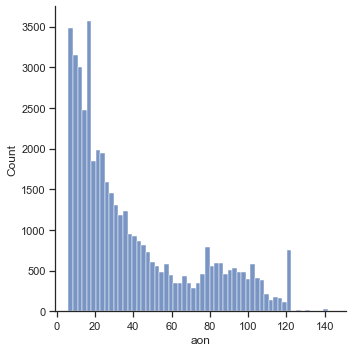

In [65]:
sns.displot(highvalue['aon'] / 30)

In [66]:
(highvalue['aon']/30).mean()

39.79441470726268

In [67]:
(highvalue['aon']/30).median()

27.466666666666665

### Define Target Variable (Churn)

We have data from June to September.

**Definition of churn**: The churn customers don't have incoming and outgoing calls, and don't use the Internet data in September.

We have four features related to customers usage of calls and the Internet.
1. total_ic_mou_9: total incoming call time in minutes in September
2. total_og_mou_9: total outgoing call time in minutes in September
3. vol_2g_mb_9: total 2G data in MB in September
4. vol_3g_mb_9: total 3G data in MB in September

In [68]:
highvalue[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.0,0.0
1,188.04,72.11,0.0,0.0
3,305.38,362.54,0.0,0.0
6,2572.49,65.91,0.0,0.0
7,0.00,0.00,0.0,0.0


How many customers churned (label 1) and how many stayed (label 0).

In [69]:
highvalue['churn_flag'] = np.where(
    (highvalue['total_ic_mou_9'] == 0.00) & (highvalue['total_og_mou_9'] == 0.00)
    & (highvalue['vol_2g_mb_9'] == 0.00) & (highvalue['vol_3g_mb_9'] == 0.00),
    1, 0)
highvalue['churn_flag'].value_counts()

0    41940
1    4205 
Name: churn_flag, dtype: int64

The percentage of churn (label 1) and stayed (label 0) customers (Unbalanced dataset).

In [70]:
highvalue['churn_flag'].value_counts() * 100/highvalue.shape[0]

0    90.88742
1    9.11258 
Name: churn_flag, dtype: float64

filter out data in September because we only use data from pervious months to predict.

In [71]:
highvalue = highvalue.drop(highvalue.filter(regex='_9|sep', axis = 1).columns, axis=1)
highvalue.shape

(46145, 178)

<a class="anchor" id="filter-single"></a>

### Filter Out Useless Features: Single Unique Values & Mobile Number

In [72]:
unique_stats = highvalue.nunique().to_frame().reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})
unique_stats[unique_stats['nunique'] == 1]

,feature,nunique
1,circle_id,1
2,loc_og_t2o_mou,1
3,std_og_t2o_mou,1
4,loc_ic_t2o_mou,1
5,last_date_of_month_6,1
6,last_date_of_month_7,1
7,last_date_of_month_8,1
47,std_og_t2c_mou_6,1
48,std_og_t2c_mou_7,1
49,std_og_t2c_mou_8,1


In [73]:
single_cols = unique_stats.loc[unique_stats['nunique'] == 1, 'feature']
highvalue.drop(columns=single_cols, inplace=True)
highvalue.shape

(46145, 165)

<a class="anchor" id="missing-values"></a>

In [74]:
highvalue.drop(columns=['mobile_number'], inplace=True)

### Missing Values

In [75]:
round((highvalue.isna().sum()*100/highvalue.shape[0]),2).sort_values(ascending=False)

arpu_2g_6                   55.20
date_of_last_rech_data_6    55.20
count_rech_3g_6             55.20
night_pck_user_6            55.20
count_rech_2g_6             55.20
max_rech_data_6             55.20
total_rech_data_6           55.20
av_rech_amt_data_6          55.20
fb_user_6                   55.20
total_data_rech_amt_6       55.20
arpu_3g_6                   55.20
date_of_last_rech_data_7    53.86
max_rech_data_7             53.86
count_rech_3g_7             53.86
av_rech_amt_data_7          53.86
count_rech_2g_7             53.86
total_data_rech_amt_7       53.86
arpu_2g_7                   53.86
total_rech_data_7           53.86
fb_user_7                   53.86
arpu_3g_7                   53.86
night_pck_user_7            53.86
arpu_3g_8                   52.40
arpu_2g_8                   52.40
night_pck_user_8            52.40
av_rech_amt_data_8          52.40
max_rech_data_8             52.40
count_rech_3g_8             52.40
count_rech_2g_8             52.40
total_rech_dat

#### av_rech_amt_data_8

Let's look at `av_rech_amt_data_8`, which has highest missing rate. This feature means average recharge amount for data usage in August.

There are two possibilities why this feature have missing values:
1. **Customers did not recharge at all**, so we need to assign 0 to this feature 
2. **Our data collection system fail to collect the data**, so we can use mean, median or EM algorithm to fill it

Let's check what is the actual reason.

Firstly, get the data-recharge-related columns

In [76]:
rech_data_cols = ['date_of_last_rech_data', 'total_rech_data', 'max_rech_data', 
                  'count_rech_2g', 'count_rech_3g', 'av_rech_amt_data', 
                  'vol_2g_mb', 'vol_3g_mb', 'arpu_3g', 'arpu_2g', 
                  'night_pck_user', 'monthly_2g', 'sachet_2g', 'monthly_3g', 
                  'sachet_3g', 'fb_user']

Find the number of unique values in these columns where `av_rech_amt_data_8` is `NaN`

In [77]:
highvalue[highvalue['av_rech_amt_data_8'].isna()][list(map(lambda ele : ele + '_8', rech_data_cols))].nunique()

date_of_last_rech_data_8    0
total_rech_data_8           0
max_rech_data_8             0
count_rech_2g_8             0
count_rech_3g_8             0
av_rech_amt_data_8          0
vol_2g_mb_8                 1
vol_3g_mb_8                 1
arpu_3g_8                   0
arpu_2g_8                   0
night_pck_user_8            0
monthly_2g_8                1
sachet_2g_8                 1
monthly_3g_8                1
sachet_3g_8                 1
fb_user_8                   0
dtype: int64

Because for rows where `av_rech_amt_data_8` is `NaN`, the number of unique values of all data-recharge-related columns is less than or equal to 1, it is very likely that they are all 0, which means customers did not recharge for data usage at all.

Let's check further.

In [78]:
highvalue[highvalue['av_rech_amt_data_8'].isna()][list(map(lambda ele : ele + '_8', rech_data_cols))].head()

,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_3g_8,arpu_2g_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN


From previous data, We can conclude that customers did not recharge for data usage at all. Therefore, fill all rows with 0.

In [79]:
highvalue['av_rech_amt_data_8'].fillna(0, inplace=True)
highvalue['av_rech_amt_data_8'].isna().sum()

0

In [80]:
fill_cols = ['av_rech_amt_data_8', 'arpu_2g_8', 'date_of_last_rech_data_8',
             'total_data_rech_amt_8', 'total_rech_data_8', 'arpu_3g_8',
             'max_rech_data_8', 'night_pck_user_8', 'count_rech_2g_8', 
             'count_rech_3g_8', 'fb_user_8']
for col in fill_cols:
    highvalue[col].fillna(0, inplace=True)
highvalue[fill_cols].isna().sum()

av_rech_amt_data_8          0
arpu_2g_8                   0
date_of_last_rech_data_8    0
total_data_rech_amt_8       0
total_rech_data_8           0
arpu_3g_8                   0
max_rech_data_8             0
night_pck_user_8            0
count_rech_2g_8             0
count_rech_3g_8             0
fb_user_8                   0
dtype: int64

#### arpu_3g_6

fill the missing data similarily as `av_rech_amt_data_8`

In [81]:
highvalue[highvalue['arpu_3g_6'].isna()][list(map(lambda ele : ele + '_6', rech_data_cols))].nunique()

date_of_last_rech_data_6    0
total_rech_data_6           0
max_rech_data_6             0
count_rech_2g_6             0
count_rech_3g_6             0
av_rech_amt_data_6          0
vol_2g_mb_6                 1
vol_3g_mb_6                 1
arpu_3g_6                   0
arpu_2g_6                   0
night_pck_user_6            0
monthly_2g_6                1
sachet_2g_6                 1
monthly_3g_6                1
sachet_3g_6                 1
fb_user_6                   0
dtype: int64

In [82]:
highvalue[highvalue['arpu_3g_6'].isna()][list(map(lambda ele : ele + '_6', rech_data_cols))].head()

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,vol_2g_mb_6,vol_3g_mb_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6,fb_user_6
1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0,0,0,0,NaN


In [83]:
fill_cols = ['fb_user_6', 'arpu_3g_6', 'max_rech_data_6', 'arpu_2g_6', 
             'total_rech_data_6', 'total_data_rech_amt_6', 'av_rech_amt_data_6', 
             'night_pck_user_6', 'count_rech_2g_6', 'date_of_last_rech_data_6',
             'count_rech_3g_6']
for col in fill_cols:
    highvalue[col].fillna(0, inplace=True)
highvalue[fill_cols].isna().sum()

fb_user_6                   0
arpu_3g_6                   0
max_rech_data_6             0
arpu_2g_6                   0
total_rech_data_6           0
total_data_rech_amt_6       0
av_rech_amt_data_6          0
night_pck_user_6            0
count_rech_2g_6             0
date_of_last_rech_data_6    0
count_rech_3g_6             0
dtype: int64

#### arpu_3g_7

fill the missing data similarily as `av_rech_amt_data_8`

In [84]:
highvalue[highvalue['arpu_3g_7'].isna()][list(map(lambda ele : ele + '_7', rech_data_cols))].nunique()

date_of_last_rech_data_7    0
total_rech_data_7           0
max_rech_data_7             0
count_rech_2g_7             0
count_rech_3g_7             0
av_rech_amt_data_7          0
vol_2g_mb_7                 1
vol_3g_mb_7                 1
arpu_3g_7                   0
arpu_2g_7                   0
night_pck_user_7            0
monthly_2g_7                1
sachet_2g_7                 1
monthly_3g_7                1
sachet_3g_7                 1
fb_user_7                   0
dtype: int64

In [85]:
fill_cols = ['total_rech_data_7', 'max_rech_data_7', 'date_of_last_rech_data_7', 
             'night_pck_user_7', 'fb_user_7', 'count_rech_3g_7', 'arpu_2g_7', 
             'total_data_rech_amt_7', 'av_rech_amt_data_7', 'arpu_3g_7',
             'count_rech_2g_7']
for col in fill_cols:
    highvalue[col].fillna(0, inplace=True)
highvalue[fill_cols].isna().sum()

total_rech_data_7           0
max_rech_data_7             0
date_of_last_rech_data_7    0
night_pck_user_7            0
fb_user_7                   0
count_rech_3g_7             0
arpu_2g_7                   0
total_data_rech_amt_7       0
av_rech_amt_data_7          0
arpu_3g_7                   0
count_rech_2g_7             0
dtype: int64

#### loc_og_mou_8

fill the missing data similarily as `av_rech_amt_data_8`

In [86]:
og_ic_8_cols = highvalue.filter(regex='(og|ic).*_8').columns
og_ic_8_cols

Index(['roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8',
       'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8',
       'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8'],
      dtype='object')

In [87]:
highvalue[highvalue['loc_og_mou_8'].isna()][og_ic_8_cols].nunique()

roam_ic_mou_8       0
roam_og_mou_8       0
loc_og_t2t_mou_8    0
loc_og_t2m_mou_8    0
loc_og_t2f_mou_8    0
loc_og_t2c_mou_8    0
loc_og_mou_8        0
std_og_t2t_mou_8    0
std_og_t2m_mou_8    0
std_og_t2f_mou_8    0
std_og_mou_8        0
isd_og_mou_8        0
spl_og_mou_8        0
og_others_8         0
total_og_mou_8      1
loc_ic_t2t_mou_8    0
loc_ic_t2m_mou_8    0
loc_ic_t2f_mou_8    0
loc_ic_mou_8        0
std_ic_t2t_mou_8    0
std_ic_t2m_mou_8    0
std_ic_t2f_mou_8    0
std_ic_mou_8        0
total_ic_mou_8      1
spl_ic_mou_8        0
isd_ic_mou_8        0
ic_others_8         0
dtype: int64

In [88]:
highvalue[highvalue['loc_og_mou_8'].isna()][og_ic_8_cols].head()

,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8
111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [89]:
fill_cols = ['loc_og_mou_8', 'std_ic_t2t_mou_8', 'loc_og_t2f_mou_8', 
             'isd_ic_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_8',
             'ic_others_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
             'std_og_mou_8', 'loc_og_t2t_mou_8', 'std_ic_t2f_mou_8',
             'isd_og_mou_8', 'spl_og_mou_8', 'loc_ic_mou_8', 'og_others_8',
             'loc_ic_t2f_mou_8', 'loc_ic_t2t_mou_8', 'loc_og_t2m_mou_8',
             'loc_ic_t2m_mou_8', 'offnet_mou_8', 'spl_ic_mou_8',
             'roam_og_mou_8', 'std_ic_t2m_mou_8', 'onnet_mou_8',
             'std_ic_mou_8', 'roam_ic_mou_8']
for col in fill_cols:
    highvalue[col].fillna(0, inplace=True)
highvalue[fill_cols].isna().sum()

loc_og_mou_8        0
std_ic_t2t_mou_8    0
loc_og_t2f_mou_8    0
isd_ic_mou_8        0
loc_og_t2c_mou_8    0
std_og_t2t_mou_8    0
ic_others_8         0
std_og_t2m_mou_8    0
std_og_t2f_mou_8    0
std_og_mou_8        0
loc_og_t2t_mou_8    0
std_ic_t2f_mou_8    0
isd_og_mou_8        0
spl_og_mou_8        0
loc_ic_mou_8        0
og_others_8         0
loc_ic_t2f_mou_8    0
loc_ic_t2t_mou_8    0
loc_og_t2m_mou_8    0
loc_ic_t2m_mou_8    0
offnet_mou_8        0
spl_ic_mou_8        0
roam_og_mou_8       0
std_ic_t2m_mou_8    0
onnet_mou_8         0
std_ic_mou_8        0
roam_ic_mou_8       0
dtype: int64

#### arpu_3g_6

Use different method to fill `arpu_3g_6`

In [90]:
rech_8_cols = highvalue.filter(regex='rech.*_8').columns

In [91]:
highvalue[highvalue['date_of_last_rech_8'].isna()][rech_8_cols].nunique()

total_rech_num_8            1
total_rech_amt_8            1
max_rech_amt_8              1
date_of_last_rech_8         0
last_day_rech_amt_8         1
date_of_last_rech_data_8    2
total_rech_data_8           2
max_rech_data_8             2
count_rech_2g_8             2
count_rech_3g_8             1
av_rech_amt_data_8          2
total_data_rech_amt_8       2
dtype: int64

In [92]:
highvalue[highvalue['date_of_last_rech_8'].isna()][rech_8_cols].head()

,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8,last_day_rech_amt_8,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,total_data_rech_amt_8
188,0,0,0,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0
191,0,0,0,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0
490,0,0,0,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0
577,0,0,0,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0
578,0,0,0,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Because `date_of_last_rech_data_8` has 2 different values, let's check how the data looks like when `date_of_last_rech_data_8` is not 0.

In [93]:
non_zero_row = highvalue.loc[highvalue['date_of_last_rech_8'].isna() & 
                             (highvalue['date_of_last_rech_data_8'] != 0), 
                             rech_8_cols]
non_zero_row

,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,date_of_last_rech_8,last_day_rech_amt_8,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,total_data_rech_amt_8
25540,0,0,0,NaN,0,8/12/2014,1.0,154.0,1.0,0.0,154.0,154.0


As we can seen above, there is only one row where `date_of_last_rech_data_8` is not 0.

We have over 30,000 rows of data thus we can simply drop this row.

In [94]:
highvalue.drop(non_zero_row.index, inplace=True)

In [95]:
zero_row = highvalue.loc[highvalue['date_of_last_rech_8'].isna() & 
                         (highvalue['date_of_last_rech_data_8'] == 0), 
                         rech_8_cols]
zero_row.nunique()

total_rech_num_8            1
total_rech_amt_8            1
max_rech_amt_8              1
date_of_last_rech_8         0
last_day_rech_amt_8         1
date_of_last_rech_data_8    1
total_rech_data_8           1
max_rech_data_8             1
count_rech_2g_8             1
count_rech_3g_8             1
av_rech_amt_data_8          1
total_data_rech_amt_8       1
dtype: int64

fill other `date_of_last_rech_8` as 0

In [96]:
highvalue['date_of_last_rech_8'].fillna(0, inplace=True)
highvalue['date_of_last_rech_8'].isna().sum()

0

#### std_ic_t2t_mou_7

fill the missing data similarily as `av_rech_amt_data_8`

In [97]:
og_ic_7_cols = highvalue.filter(regex='(og|ic).*_7').columns
og_ic_7_cols

Index(['roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7',
       'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7',
       'std_og_t2f_mou_7', 'std_og_mou_7', 'isd_og_mou_7', 'spl_og_mou_7',
       'og_others_7', 'total_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7',
       'loc_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7',
       'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7',
       'total_ic_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7'],
      dtype='object')

In [98]:
highvalue[highvalue['std_ic_mou_7'].isna()][og_ic_7_cols].nunique()

roam_ic_mou_7       0
roam_og_mou_7       0
loc_og_t2t_mou_7    0
loc_og_t2m_mou_7    0
loc_og_t2f_mou_7    0
loc_og_t2c_mou_7    0
loc_og_mou_7        0
std_og_t2t_mou_7    0
std_og_t2m_mou_7    0
std_og_t2f_mou_7    0
std_og_mou_7        0
isd_og_mou_7        0
spl_og_mou_7        0
og_others_7         0
total_og_mou_7      1
loc_ic_t2t_mou_7    0
loc_ic_t2m_mou_7    0
loc_ic_t2f_mou_7    0
loc_ic_mou_7        0
std_ic_t2t_mou_7    0
std_ic_t2m_mou_7    0
std_ic_t2f_mou_7    0
std_ic_mou_7        0
total_ic_mou_7      1
spl_ic_mou_7        0
isd_ic_mou_7        0
ic_others_7         0
dtype: int64

In [99]:
highvalue[highvalue['std_ic_mou_7'].isna()][og_ic_7_cols].head()

,roam_ic_mou_7,roam_og_mou_7,loc_og_t2t_mou_7,loc_og_t2m_mou_7,loc_og_t2f_mou_7,loc_og_t2c_mou_7,loc_og_mou_7,std_og_t2t_mou_7,std_og_t2m_mou_7,std_og_t2f_mou_7,std_og_mou_7,isd_og_mou_7,spl_og_mou_7,og_others_7,total_og_mou_7,loc_ic_t2t_mou_7,loc_ic_t2m_mou_7,loc_ic_t2f_mou_7,loc_ic_mou_7,std_ic_t2t_mou_7,std_ic_t2m_mou_7,std_ic_t2f_mou_7,std_ic_mou_7,total_ic_mou_7,spl_ic_mou_7,isd_ic_mou_7,ic_others_7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [100]:
fill_cols = ['std_ic_mou_7', 'loc_og_t2t_mou_7', 'std_og_t2f_mou_7', 
             'isd_og_mou_7', 'std_og_t2m_mou_7', 'spl_og_mou_7',
             'std_og_t2t_mou_7', 'og_others_7', 'loc_og_mou_7',
             'loc_ic_t2t_mou_7', 'loc_og_t2c_mou_7', 'loc_ic_t2m_mou_7',
             'loc_og_t2f_mou_7', 'loc_ic_t2f_mou_7', 'loc_og_t2m_mou_7',
             'loc_ic_mou_7', 'std_og_mou_7', 'onnet_mou_7', 
             'roam_og_mou_7', 'std_ic_t2m_mou_7', 'spl_ic_mou_7', 
             'roam_ic_mou_7', 'ic_others_7', 'std_ic_t2f_mou_7', 
             'offnet_mou_7', 'std_ic_t2t_mou_7', 'isd_ic_mou_7']
for col in fill_cols:
    highvalue[col].fillna(0, inplace=True)
highvalue[fill_cols].isna().sum()

std_ic_mou_7        0
loc_og_t2t_mou_7    0
std_og_t2f_mou_7    0
isd_og_mou_7        0
std_og_t2m_mou_7    0
spl_og_mou_7        0
std_og_t2t_mou_7    0
og_others_7         0
loc_og_mou_7        0
loc_ic_t2t_mou_7    0
loc_og_t2c_mou_7    0
loc_ic_t2m_mou_7    0
loc_og_t2f_mou_7    0
loc_ic_t2f_mou_7    0
loc_og_t2m_mou_7    0
loc_ic_mou_7        0
std_og_mou_7        0
onnet_mou_7         0
roam_og_mou_7       0
std_ic_t2m_mou_7    0
spl_ic_mou_7        0
roam_ic_mou_7       0
ic_others_7         0
std_ic_t2f_mou_7    0
offnet_mou_7        0
std_ic_t2t_mou_7    0
isd_ic_mou_7        0
dtype: int64

#### std_ic_mou_6

fill the missing data similarily as `av_rech_amt_data_8`

In [101]:
og_ic_6_cols = highvalue.filter(regex='(og|ic).*_6').columns
og_ic_6_cols

Index(['roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6',
       'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6',
       'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6',
       'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6',
       'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6',
       'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6'],
      dtype='object')

In [102]:
highvalue[highvalue['std_ic_mou_6'].isna()][og_ic_6_cols].nunique()

roam_ic_mou_6       0
roam_og_mou_6       0
loc_og_t2t_mou_6    0
loc_og_t2m_mou_6    0
loc_og_t2f_mou_6    0
loc_og_t2c_mou_6    0
loc_og_mou_6        0
std_og_t2t_mou_6    0
std_og_t2m_mou_6    0
std_og_t2f_mou_6    0
std_og_mou_6        0
isd_og_mou_6        0
spl_og_mou_6        0
og_others_6         0
total_og_mou_6      1
loc_ic_t2t_mou_6    0
loc_ic_t2m_mou_6    0
loc_ic_t2f_mou_6    0
loc_ic_mou_6        0
std_ic_t2t_mou_6    0
std_ic_t2m_mou_6    0
std_ic_t2f_mou_6    0
std_ic_mou_6        0
total_ic_mou_6      1
spl_ic_mou_6        0
isd_ic_mou_6        0
ic_others_6         0
dtype: int64

In [103]:
highvalue[highvalue['std_ic_mou_6'].isna()][og_ic_6_cols].head()

,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,og_others_6,total_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [104]:
fill_cols = ['std_ic_t2t_mou_6', 'std_ic_mou_6', 'isd_og_mou_6', 
             'spl_og_mou_6', 'isd_ic_mou_6', 'loc_ic_t2t_mou_6',
             'og_others_6', 'std_ic_t2f_mou_6', 'ic_others_6',
             'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'std_ic_t2m_mou_6',
             'std_og_mou_6', 'loc_ic_mou_6', 'spl_ic_mou_6',
             'roam_ic_mou_6', 'onnet_mou_6', 'loc_og_t2t_mou_6', 
             'loc_og_t2f_mou_6', 'roam_og_mou_6', 'loc_og_t2c_mou_6', 
             'loc_og_mou_6', 'offnet_mou_6', 'loc_og_t2m_mou_6', 
             'std_og_t2t_mou_6', 'std_og_t2f_mou_6', 'std_og_t2m_mou_6']
for col in fill_cols:
    highvalue[col].fillna(0, inplace=True)
highvalue[fill_cols].isna().sum()

std_ic_t2t_mou_6    0
std_ic_mou_6        0
isd_og_mou_6        0
spl_og_mou_6        0
isd_ic_mou_6        0
loc_ic_t2t_mou_6    0
og_others_6         0
std_ic_t2f_mou_6    0
ic_others_6         0
loc_ic_t2m_mou_6    0
loc_ic_t2f_mou_6    0
std_ic_t2m_mou_6    0
std_og_mou_6        0
loc_ic_mou_6        0
spl_ic_mou_6        0
roam_ic_mou_6       0
onnet_mou_6         0
loc_og_t2t_mou_6    0
loc_og_t2f_mou_6    0
roam_og_mou_6       0
loc_og_t2c_mou_6    0
loc_og_mou_6        0
offnet_mou_6        0
loc_og_t2m_mou_6    0
std_og_t2t_mou_6    0
std_og_t2f_mou_6    0
std_og_t2m_mou_6    0
dtype: int64

#### date_of_last_rech_7

fill the missing data similarily as `av_rech_amt_data_8`

In [105]:
rech_cols = ['total_rech_num', 'total_rech_amt', 'max_rech_amt',
             'date_of_last_rech', 'last_day_rech_amt', 'date_of_last_rech_data',
             'total_rech_data', 'max_rech_data', 'count_rech_2g',
             'count_rech_3g', 'av_rech_amt_data', 'vol_2g_mb', 'vol_3g_mb',
             'arpu_3g', 'arpu_2g', 'night_pck_user', 'monthly_2g',
             'sachet_2g', 'monthly_3g', 'sachet_3g', 'fb_user']

In [106]:
highvalue[highvalue['date_of_last_rech_7'].isna()][list(map(lambda ele : ele + '_7', rech_cols))].nunique()

total_rech_num_7            1
total_rech_amt_7            1
max_rech_amt_7              1
date_of_last_rech_7         0
last_day_rech_amt_7         1
date_of_last_rech_data_7    1
total_rech_data_7           1
max_rech_data_7             1
count_rech_2g_7             1
count_rech_3g_7             1
av_rech_amt_data_7          1
vol_2g_mb_7                 1
vol_3g_mb_7                 1
arpu_3g_7                   1
arpu_2g_7                   1
night_pck_user_7            1
monthly_2g_7                1
sachet_2g_7                 1
monthly_3g_7                1
sachet_3g_7                 1
fb_user_7                   1
dtype: int64

In [107]:
highvalue[highvalue['date_of_last_rech_7'].isna()][list(map(lambda ele : ele + '_7', rech_cols))].head()

,total_rech_num_7,total_rech_amt_7,max_rech_amt_7,date_of_last_rech_7,last_day_rech_amt_7,date_of_last_rech_data_7,total_rech_data_7,max_rech_data_7,count_rech_2g_7,count_rech_3g_7,av_rech_amt_data_7,vol_2g_mb_7,vol_3g_mb_7,arpu_3g_7,arpu_2g_7,night_pck_user_7,monthly_2g_7,sachet_2g_7,monthly_3g_7,sachet_3g_7,fb_user_7
68,0,0,0,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0
404,0,0,0,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0
490,0,0,0,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0
603,0,0,0,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0
674,0,0,0,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0


In [108]:
highvalue['date_of_last_rech_7'].fillna(0, inplace=True)
highvalue['date_of_last_rech_7'].isna().sum()

0

#### date_of_last_rech_6

fill the missing data similarily as `av_rech_amt_data_8`

In [109]:
highvalue[highvalue['date_of_last_rech_6'].isna()][list(map(lambda ele : ele + '_6', rech_cols))].nunique()

total_rech_num_6            1
total_rech_amt_6            1
max_rech_amt_6              1
date_of_last_rech_6         0
last_day_rech_amt_6         1
date_of_last_rech_data_6    1
total_rech_data_6           1
max_rech_data_6             1
count_rech_2g_6             1
count_rech_3g_6             1
av_rech_amt_data_6          1
vol_2g_mb_6                 1
vol_3g_mb_6                 1
arpu_3g_6                   1
arpu_2g_6                   1
night_pck_user_6            1
monthly_2g_6                1
sachet_2g_6                 1
monthly_3g_6                1
sachet_3g_6                 1
fb_user_6                   1
dtype: int64

In [110]:
highvalue[highvalue['date_of_last_rech_6'].isna()][list(map(lambda ele : ele + '_6', rech_cols))].head()

,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6,last_day_rech_amt_6,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,vol_2g_mb_6,vol_3g_mb_6,arpu_3g_6,arpu_2g_6,night_pck_user_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6,fb_user_6
91,0,0,0,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0
263,0,0,0,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0
414,0,0,0,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0
497,0,0,0,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0
729,0,0,0,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0


In [111]:
highvalue['date_of_last_rech_6'].fillna(0, inplace=True)
highvalue['date_of_last_rech_6'].isna().sum()

0

#### check whether we still have any missing values

In [112]:
highvalue.isna().values.any()

False

<a class="anchor" id="derive-features"></a>

### Derived Features

Change date columns to `datetime` type

In [113]:
date_cols = highvalue.filter(regex='date').columns
for col in date_cols:
    highvalue[col] = pd.to_datetime(highvalue[col])
highvalue[date_cols].info(verbose=True, null_counts=True) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46144 entries, 0 to 99998
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date_of_last_rech_6       46144 non-null  datetime64[ns]
 1   date_of_last_rech_7       46144 non-null  datetime64[ns]
 2   date_of_last_rech_8       46144 non-null  datetime64[ns]
 3   date_of_last_rech_data_6  46144 non-null  datetime64[ns]
 4   date_of_last_rech_data_7  46144 non-null  datetime64[ns]
 5   date_of_last_rech_data_8  46144 non-null  datetime64[ns]
dtypes: datetime64[ns](6)
memory usage: 2.5 MB


In [114]:
(highvalue['date_of_last_rech_6'] == dt.datetime(1970, 1, 1)).sum()

441

In [115]:
def na_category(row, original_col, c_num, func):
    # if date equal to 1970-01-01, which means date is nan
    # then our customers didn't take any actions
    if row[original_col] == dt.datetime(1970, 1, 1):
        return c_num
    # otherwise, the action took at this time
    return func(row[original_col])

In [116]:
# highvalue['date_of_last_rech_dayofweek_6'] = highvalue['date_of_last_rech_6'].dt.dayofweek
for col in date_cols:
    highvalue['dayofweek_' + col] = highvalue.apply(
        na_category, 
        axis=1, 
        args=(col, 7, lambda x : x.dayofweek,))
    highvalue['dayofweek_' + col] = highvalue['dayofweek_' + col].map({0: 'monday',
                                                                       1: 'tuesday',
                                                                       2: 'wednesday',
                                                                       3: 'thursday',
                                                                       4: 'friday',
                                                                       5: 'saturday',
                                                                       6: 'sunday',
                                                                       7: 'no_rech'})
    highvalue['partofmonth_' + col] = highvalue.apply(
        na_category,
        axis=1,
        args=(col, 3, lambda x : min(int((x.day - 1) / 10), 2),))
    highvalue['partofmonth_' + col] = highvalue['partofmonth_' + col].map({0: 'early',
                                                                           1: 'middle',
                                                                           2: 'late',
                                                                           3: 'no_rech'})

In [117]:
(highvalue['partofmonth_date_of_last_rech_6'] == 'early').sum() / (highvalue['partofmonth_date_of_last_rech_6'] != 'early').sum()

0.017957202735495257

In [118]:
highvalue = pd.get_dummies(highvalue, columns=list(map(lambda x : 'dayofweek_' + x, date_cols)))
highvalue = pd.get_dummies(highvalue, columns=list(map(lambda x : 'partofmonth_' + x, date_cols)))

In [119]:
highvalue.drop(date_cols, axis=1, inplace=True)

In [120]:
# fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# ax = sns.distplot(highvalue.loc[highvalue['churn_flag'] == 1, 'partofmonth_date_of_last_rech_6'], bins = 3, ax = axes[0], kde = False)
# ax.set_title('Churn')
# ax.grid()
# ax = sns.distplot(highvalue.loc[highvalue['churn_flag'] == 0, 'partofmonth_date_of_last_rech_6'], bins = 3, ax = axes[1], kde = False)
# ax.set_title('Non-Churn')
# ax.grid()
# plt.show()

In [121]:
# fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# ax = sns.distplot(highvalue.loc[highvalue['churn_flag'] == 1, 'partofmonth_date_of_last_rech_data_8'], bins = 3, ax = axes[0], kde = False)
# ax.set_title('Churn')
# ax.grid()
# ax = sns.distplot(highvalue.loc[highvalue['churn_flag'] == 0, 'partofmonth_date_of_last_rech_data_8'], bins = 3, ax = axes[1], kde = False)
# ax.set_title('Non-Churn')
# ax.grid()
# plt.show()

In [122]:
mou_cols = highvalue.filter(regex='mou').columns
mou_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mo

In [123]:
highvalue[mou_cols].head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00
1,24.11,78.68,7.68,15.74,99.84,304.76,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,11.51,75.94,291.86,0.00,0.00,0.00,0.00,2.91,0.0,35.39,150.51,299.54,0.23,4.11,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.23,4.58,0.13,0.0,0.00,0.00,4.68,23.43,12.76,40.31,178.53,312.44,1.61,29.91,29.23,17.48,65.38,375.58,0.00,8.93,3.61,19.09,104.23,408.43,0.00,0.00,2.35,5.90,0.00,12.49,0.00,0.00,0.00,5.90,0.00,14.84,26.83,104.23,423.28,0.00,0.0,0.0,1.83,0.00,0.00
3,99.91,54.39,310.98,123.31,109.01,71.68,0.00,54.86,44.38,0.00,28.09,39.04,73.68,34.81,10.61,107.43,83.21,22.46,1.91,0.65,4.91,0.00,0.00,0.0,183.03,118.68,37.99,26.23,14.89,289.58,2.99,1.73,6.53,0.00,0.00,0.00,29.23,16.63,296.11,0.0,0.00,0.00,10.96,0.00,18.09,223.23,135.31,352.21,62.08,19.98,8.04,113.96,64.51,20.28,57.43,27.09,19.84,233.48,111.59,48.18,43.48,66.44,0.00,1.33,38.56,4.94,1.18,0.00,0.00,45.99,105.01,4.94,280.08,216.61,53.13,0.59,0.0,0.0,0.00,0.00,0.00
6,71.03,45.03,76.66,262.73,49.24,92.08,0.00,0.00,0.00,0.00,0.00,0.00,71.03,45.03,76.14,252.23,48.71,80.63,10.38,0.00,0.00,0.11,0.00,0.0,333.64,93.74,156.78,0.00,0.00,0.51,0.00,0.53,11.45,0.00,0.00,0.00,0.00,0.53,11.96,0.0,0.00,0.00,0.11,0.53,0.00,333.76,94.81,168.74,1857.99,1427.04,1896.43,248.64,336.96,265.28,20.24,22.69,2.51,2126.89,1786.71,2164.23,0.00,0.00,0.00,1.39,0.76,2.60,0.00,0.00,0.00,1.39,0.76,2.60,2128.41,1788.06,2167.11,0.00,0.0,0.0,0.00,0.00,0.00
7,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.0,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59


In [124]:
def gen_over_cols(cols):
    for col in set(map(lambda x : x[:-2], cols)):
        adjust_6 = highvalue[col + '_6'].apply(lambda x : x + (1 if x >= 0 else -1))
        adjust_7 = highvalue[col + '_7'].apply(lambda x : x + (1 if x >= 0 else -1))
        adjust_8 = highvalue[col + '_8'].apply(lambda x : x + (1 if x >= 0 else -1))
        
        highvalue[col + '_7over6'] = (adjust_7 / adjust_6)
        highvalue[col + '_8over7'] = (adjust_8 / adjust_7)

In [125]:
gen_over_cols(mou_cols)

highvalue[highvalue.filter(regex='mou.*(7over6|8over7)').columns].head()

,isd_og_mou_7over6,isd_og_mou_8over7,std_og_t2f_mou_7over6,std_og_t2f_mou_8over7,offnet_mou_7over6,offnet_mou_8over7,std_og_t2m_mou_7over6,std_og_t2m_mou_8over7,spl_ic_mou_7over6,spl_ic_mou_8over7,loc_ic_mou_7over6,loc_ic_mou_8over7,std_ic_t2t_mou_7over6,std_ic_t2t_mou_8over7,loc_ic_t2m_mou_7over6,loc_ic_t2m_mou_8over7,loc_og_t2t_mou_7over6,loc_og_t2t_mou_8over7,loc_og_mou_7over6,loc_og_mou_8over7,std_og_t2t_mou_7over6,std_og_t2t_mou_8over7,std_ic_mou_7over6,std_ic_mou_8over7,roam_og_mou_7over6,roam_og_mou_8over7,spl_og_mou_7over6,spl_og_mou_8over7,loc_og_t2c_mou_7over6,loc_og_t2c_mou_8over7,std_og_mou_7over6,std_og_mou_8over7,isd_ic_mou_7over6,isd_ic_mou_8over7,onnet_mou_7over6,onnet_mou_8over7,loc_ic_t2t_mou_7over6,loc_ic_t2t_mou_8over7,loc_og_t2m_mou_7over6,loc_og_t2m_mou_8over7,loc_og_t2f_mou_7over6,loc_og_t2f_mou_8over7,roam_ic_mou_7over6,roam_ic_mou_8over7,std_ic_t2m_mou_7over6,std_ic_t2m_mou_8over7,loc_ic_t2f_mou_7over6,loc_ic_t2f_mou_8over7,total_ic_mou_7over6,total_ic_mou_8over7,total_og_mou_7over6,total_og_mou_8over7,std_ic_t2f_mou_7over6,std_ic_t2f_mou_8over7
0,1.00,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,6.440000,1.000000,1.000000,1.000000,5.130000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.160000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.150000,1.000000,6.440000,1.000000,1.000000,1.000000,1.000000
1,1.00,1.000000,1.000000,1.00000,6.023895,3.032130,1.460000,0.773973,1.000000,1.0,5.237929,3.890811,1.000000,3.350000,3.591991,5.673094,3.036977,0.114876,4.163506,1.983631,4.154472,0.195695,0.144928,15.840000,1.000000,1.000000,4.301056,0.563242,3.910000,0.255754,4.536585,0.202509,0.353357,1.000000,3.173238,0.108936,11.842912,0.978001,6.150280,3.806343,1.000000,1.000000,1.000000,1.000000,0.144928,13.490000,9.930000,0.464250,3.781171,4.031930,4.345921,1.745892,1.000000,1.000000
3,1.00,1.000000,1.000000,1.00000,0.884965,0.660667,0.684211,2.758242,0.628931,1.0,0.480169,0.436806,1.516187,0.014828,0.569850,0.324836,0.479513,0.324211,0.650329,0.325785,0.583548,18.286973,2.256012,0.056032,29.090000,1.376418,0.083612,19.090000,1.000000,1.000000,0.583196,16.852524,1.000000,1.000000,0.548905,5.632425,0.332594,0.430887,0.776630,0.278589,0.567010,3.581818,55.860000,0.812388,16.978541,0.150152,0.480746,0.741901,0.774192,0.248748,0.607903,2.591226,0.458716,1.000000
6,1.00,1.000000,1.000000,1.00000,0.190498,1.852707,1.530000,8.137255,1.000000,1.0,0.840133,1.211175,1.000000,1.000000,1.353789,0.787904,0.639039,1.675864,0.283110,1.665400,1.000000,1.510000,0.736402,2.045455,1.000000,1.000000,1.378378,0.653595,0.900901,1.000000,1.530000,8.470588,1.000000,1.000000,0.639039,1.687161,0.768181,1.328695,0.196304,1.642124,0.087873,1.000000,1.000000,1.000000,0.736402,2.045455,1.115348,0.148164,0.840167,1.211871,0.286205,1.771631,1.000000,1.000000
7,1.18,9.330508,2.751958,0.83871,1.250270,0.575384,0.643741,1.530525,0.826446,1.0,0.830605,0.530668,0.338612,2.446610,1.017981,0.549193,0.618057,1.274861,1.264085,0.480062,4.583019,0.535611,0.958907,1.119830,0.549313,2.874172,0.181818,7.500000,1.000000,1.000000,1.230844,1.035461,5.075163,2.098519,0.946295,0.957076,0.562394,0.851173,1.448115,0.364155,0.889276,0.965978,2.001741,0.946361,1.384574,1.112040,0.668974,0.395569,0.890957,0.768711,1.249135,0.575446,0.662531,0.658627


In [126]:
other_cols = highvalue.filter(regex='other').columns
other_cols

Index(['og_others_6', 'og_others_7', 'og_others_8', 'ic_others_6',
       'ic_others_7', 'ic_others_8'],
      dtype='object')

In [127]:
gen_over_cols(other_cols)

highvalue[highvalue.filter(regex='other.*(7over6|8over7)').columns].head()

,ic_others_7over6,ic_others_8over7,og_others_7over6,og_others_8over7
0,1.000000,1.000000,1.0,1.0
1,1.000000,1.000000,1.0,1.0
3,1.000000,1.000000,1.0,1.0
6,1.423423,0.810127,1.0,1.0
7,0.967145,0.996912,1.0,1.0


In [128]:
data_cols = highvalue.filter(regex='(2g|3g)').columns
data_cols

Index(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6'],
      dtype='object')

In [129]:
gen_over_cols(data_cols)

highvalue[highvalue.filter(regex='(2g|3g).*(7over6|8over7)').columns].head()

,count_rech_2g_7over6,count_rech_2g_8over7,monthly_3g_7over6,monthly_3g_8over7,vbc_3g_7over6,vbc_3g_8over7,sachet_2g_7over6,sachet_2g_8over7,sachet_3g_7over6,sachet_3g_8over7,vol_2g_mb_7over6,vol_2g_mb_8over7,arpu_3g_7over6,arpu_3g_8over7,arpu_2g_7over6,arpu_2g_8over7,vol_3g_mb_7over6,vol_3g_mb_8over7,monthly_2g_7over6,monthly_2g_8over7,count_rech_3g_7over6,count_rech_3g_8over7
0,1.0,1.0,1.0,1.0,0.009785,31.400000,1.0,1.0,1.0,1.0,0.074526,2.909483,1.0,1.0,1.00,1.000000,1.79449,0.728848,1.0,1.0,1.0,1.0
1,2.0,1.5,1.0,1.0,1.000000,1.000000,1.0,3.0,1.0,1.0,109.070000,3.359952,1.0,1.0,29.61,0.290442,1.00000,1.000000,2.0,0.5,1.0,1.0
3,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.00,1.000000,1.00000,1.000000,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.00,1.000000,1.00000,1.000000,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.032421,2.882237,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.00,1.000000,1.00000,1.000000,1.0,1.0,1.0,1.0


In [130]:
arpu_cols = highvalue.filter(regex='arpu_(?!(2g|3g))').columns
arpu_cols

Index(['arpu_6', 'arpu_7', 'arpu_8'], dtype='object')

In [131]:
gen_over_cols(arpu_cols)

highvalue[highvalue.filter(regex='arpu.*(7over6|8over7)').columns].head()

,arpu_3g_7over6,arpu_3g_8over7,arpu_2g_7over6,arpu_2g_8over7,arpu_7over6,arpu_8over7
0,1.0,1.0,1.00,1.000000,1.087865,0.995306
1,1.0,1.0,29.61,0.290442,10.159900,0.756362
3,1.0,1.0,1.00,1.000000,1.133868,2.019238
6,1.0,1.0,1.00,1.000000,0.445799,1.335987
7,1.0,1.0,1.00,1.000000,1.262264,2.348506


In [132]:
highvalue.shape

(46144, 312)

In [133]:
# drop highly related value

In [134]:
abs_corr_matrix = highvalue.corr().abs()
abs_corr_matrix = abs_corr_matrix.where(np.triu(np.ones(abs_corr_matrix.shape), k=1).astype(bool))
high_corr_indices = np.asarray(abs_corr_matrix > 0.8).nonzero()
correlated_pairs = [(abs_corr_matrix.index[x], abs_corr_matrix.columns[y]) 
                     for x, y in zip(*high_corr_indices)]
correlated_pairs

[('arpu_6', 'total_rech_amt_6'),
 ('arpu_7', 'total_rech_amt_7'),
 ('arpu_8', 'total_rech_amt_8'),
 ('onnet_mou_6', 'std_og_t2t_mou_6'),
 ('onnet_mou_7', 'std_og_t2t_mou_7'),
 ('onnet_mou_8', 'std_og_t2t_mou_8'),
 ('offnet_mou_6', 'std_og_t2m_mou_6'),
 ('offnet_mou_7', 'std_og_t2m_mou_7'),
 ('offnet_mou_8', 'std_og_t2m_mou_8'),
 ('loc_og_t2t_mou_7', 'loc_og_t2t_mou_8'),
 ('loc_og_t2m_mou_6', 'loc_og_mou_6'),
 ('loc_og_t2m_mou_7', 'loc_og_t2m_mou_8'),
 ('loc_og_mou_6', 'loc_og_mou_7'),
 ('loc_og_mou_7', 'loc_og_mou_8'),
 ('std_og_mou_6', 'total_og_mou_6'),
 ('std_og_mou_7', 'total_og_mou_7'),
 ('std_og_mou_8', 'total_og_mou_8'),
 ('isd_og_mou_6', 'isd_og_mou_7'),
 ('isd_og_mou_6', 'isd_og_mou_8'),
 ('isd_og_mou_7', 'isd_og_mou_8'),
 ('og_others_7', 'og_others_7over6'),
 ('loc_ic_t2m_mou_6', 'loc_ic_mou_6'),
 ('loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8'),
 ('loc_ic_t2m_mou_7', 'loc_ic_mou_7'),
 ('loc_ic_t2m_mou_8', 'loc_ic_mou_8'),
 ('loc_ic_mou_6', 'loc_ic_mou_7'),
 ('loc_ic_mou_6', 'total_i

In [135]:
print("# Correlated pairs (where corr > 0.8): ", len(correlated_pairs))

# Correlated pairs (where corr > 0.8):  93


In [136]:
to_drop = [column for column in abs_corr_matrix.columns if any(abs_corr_matrix[column] > 0.80)]
highvalue.drop(columns=to_drop, axis=1, inplace=True)
highvalue.shape

(46144, 235)

In [137]:
highvalue.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46144 entries, 0 to 99998
Data columns (total 235 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   arpu_6                                        46144 non-null  float64
 1   arpu_7                                        46144 non-null  float64
 2   arpu_8                                        46144 non-null  float64
 3   onnet_mou_6                                   46144 non-null  float64
 4   onnet_mou_7                                   46144 non-null  float64
 5   onnet_mou_8                                   46144 non-null  float64
 6   offnet_mou_6                                  46144 non-null  float64
 7   offnet_mou_7                                  46144 non-null  float64
 8   offnet_mou_8                                  46144 non-null  float64
 9   roam_ic_mou_6                                 46144 non-null

In [139]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(rdn_seed)
train, test = train_test_split(highvalue, train_size = 0.8, random_state = 42)

In [140]:
train.shape, test.shape

((36915, 235), (9229, 235))

In [141]:
X_train=train.drop('churn_flag',axis=1)
X_test=test.drop('churn_flag',axis=1)
y_train=train['churn_flag']
y_test=test['churn_flag']

In [142]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rech_amt_6,last_day_rech_amt_7,last_day_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,dayofweek_date_of_last_rech_6_friday,dayofweek_date_of_last_rech_6_monday,dayofweek_date_of_last_rech_6_no_rech,dayofweek_date_of_last_rech_6_saturday,dayofweek_date_of_last_rech_6_sunday,dayofweek_date_of_last_rech_6_thursday,dayofweek_date_of_last_rech_6_tuesday,dayofweek_date_of_last_rech_6_wednesday,dayofweek_date_of_last_rech_7_friday,dayofweek_date_of_last_rech_7_monday,dayofweek_date_of_last_rech_7_no_rech,dayofweek_date_of_last_rech_7_saturday,dayofweek_date_of_last_rech_7_sunday,dayofweek_date_of_last_rech_7_thursday,dayofweek_date_of_last_rech_7_tuesday,dayofweek_date_of_last_rech_7_wednesday,dayofweek_date_of_last_rech_8_friday,dayofweek_date_of_last_rech_8_monday,dayofweek_date_of_last_rech_8_no_rech,dayofweek_date_of_last_rech_8_saturday,dayofweek_date_of_last_rech_8_sunday,dayofweek_date_of_last_rech_8_thursday,dayofweek_date_of_last_rech_8_tuesday,dayofweek_date_of_last_rech_8_wednesday,dayofweek_date_of_last_rech_data_6_friday,dayofweek_date_of_last_rech_data_6_monday,dayofweek_date_of_last_rech_data_6_saturday,dayofweek_date_of_last_rech_data_6_sunday,dayofweek_date_of_last_rech_data_6_thursday,dayofweek_date_of_last_rech_data_6_tuesday,dayofweek_date_of_last_rech_data_6_wednesday,dayofweek_date_of_last_rech_data_7_friday,dayofweek_date_of_last_rech_data_7_monday,dayofweek_date_of_last_rech_data_7_saturday,dayofweek_date_of_last_rech_data_7_sunday,dayofweek_date_of_last_rech_data_7_thursday,dayofweek_date_of_last_rech_data_7_tuesday,dayofweek_date_of_last_rech_data_7_wednesday,dayofweek_date_of_last_rech_data_8_friday,dayofweek_date_of_last_rech_data_8_monday,dayofweek_date_of_last_rech_data_8_saturday,dayofweek_date_of_last_rech_data_8_sunday,dayofweek_date_of_last_rech_data_8_thursday,dayofweek_date_of_last_rech_data_8_tuesday,dayofweek_date_of_last_rech_data_8_wednesday,partofmonth_date_of_last_rech_6_early,partofmonth_date_of_last_rech_6_late,partofmonth_date_of_last_rech_7_early,partofmonth_date_of_last_rech_7_late,partofmonth_date_of_last_rech_8_early,partofmonth_date_of_last_rech_8_late,partofmonth_date_of_last_rech_8_middle,partofmonth_date_of_last_rech_data_6_early,partofmonth_date_of_last_rech_data_6_late,partofmonth_date_of_last_rech_data_6_middle,partofmonth_date_of_last_rech_data_7_early,partofmonth_date_of_last_rech_data_7_late,partofmonth_date_of_last_rech_data_7_middle,partofmonth_date_of_last_rech_data_8_early,partofmonth_date_of_last_rech_data_8_late,partofmonth_date_of_last_rech_data_

## RFE

In [143]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()
X_train_rfe = X_train.copy()
X_train_rfe[:] = scaler.fit_transform(X_train_rfe)
X_train_rfe.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rech_amt_6,last_day_rech_amt_7,last_day_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,dayofweek_date_of_last_rech_6_friday,dayofweek_date_of_last_rech_6_monday,dayofweek_date_of_last_rech_6_no_rech,dayofweek_date_of_last_rech_6_saturday,dayofweek_date_of_last_rech_6_sunday,dayofweek_date_of_last_rech_6_thursday,dayofweek_date_of_last_rech_6_tuesday,dayofweek_date_of_last_rech_6_wednesday,dayofweek_date_of_last_rech_7_friday,dayofweek_date_of_last_rech_7_monday,dayofweek_date_of_last_rech_7_no_rech,dayofweek_date_of_last_rech_7_saturday,dayofweek_date_of_last_rech_7_sunday,dayofweek_date_of_last_rech_7_thursday,dayofweek_date_of_last_rech_7_tuesday,dayofweek_date_of_last_rech_7_wednesday,dayofweek_date_of_last_rech_8_friday,dayofweek_date_of_last_rech_8_monday,dayofweek_date_of_last_rech_8_no_rech,dayofweek_date_of_last_rech_8_saturday,dayofweek_date_of_last_rech_8_sunday,dayofweek_date_of_last_rech_8_thursday,dayofweek_date_of_last_rech_8_tuesday,dayofweek_date_of_last_rech_8_wednesday,dayofweek_date_of_last_rech_data_6_friday,dayofweek_date_of_last_rech_data_6_monday,dayofweek_date_of_last_rech_data_6_saturday,dayofweek_date_of_last_rech_data_6_sunday,dayofweek_date_of_last_rech_data_6_thursday,dayofweek_date_of_last_rech_data_6_tuesday,dayofweek_date_of_last_rech_data_6_wednesday,dayofweek_date_of_last_rech_data_7_friday,dayofweek_date_of_last_rech_data_7_monday,dayofweek_date_of_last_rech_data_7_saturday,dayofweek_date_of_last_rech_data_7_sunday,dayofweek_date_of_last_rech_data_7_thursday,dayofweek_date_of_last_rech_data_7_tuesday,dayofweek_date_of_last_rech_data_7_wednesday,dayofweek_date_of_last_rech_data_8_friday,dayofweek_date_of_last_rech_data_8_monday,dayofweek_date_of_last_rech_data_8_saturday,dayofweek_date_of_last_rech_data_8_sunday,dayofweek_date_of_last_rech_data_8_thursday,dayofweek_date_of_last_rech_data_8_tuesday,dayofweek_date_of_last_rech_data_8_wednesday,partofmonth_date_of_last_rech_6_early,partofmonth_date_of_last_rech_6_late,partofmonth_date_of_last_rech_7_early,partofmonth_date_of_last_rech_7_late,partofmonth_date_of_last_rech_8_early,partofmonth_date_of_last_rech_8_late,partofmonth_date_of_last_rech_8_middle,partofmonth_date_of_last_rech_data_6_early,partofmonth_date_of_last_rech_data_6_late,partofmonth_date_of_last_rech_data_6_middle,partofmonth_date_of_last_rech_data_7_early,partofmonth_date_of_last_rech_data_7_late,partofmonth_date_of_last_rech_data_7_middle,partofmonth_date_of_last_rech_data_8_early,partofmonth_date_of_last_rech_data_8_late,partofmonth_date_of_last_rech_data_

In [144]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# Running RFE with the output number of the variable equal to 90
lr = LogisticRegression()

rfe = RFE(lr, 90)             # running RFE
rfe = rfe.fit(X_train_rfe, y_train)

In [145]:
list(zip(X_train_rfe.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', False, 73),
 ('arpu_8', True, 1),
 ('onnet_mou_6', False, 16),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 88),
 ('roam_ic_mou_7', True, 1),
 ('roam_ic_mou_8', True, 1),
 ('roam_og_mou_6', True, 1),
 ('roam_og_mou_7', False, 54),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 20),
 ('loc_og_t2t_mou_7', True, 1),
 ('loc_og_t2m_mou_6', False, 125),
 ('loc_og_t2m_mou_7', True, 1),
 ('loc_og_t2f_mou_6', False, 7),
 ('loc_og_t2f_mou_7', False, 119),
 ('loc_og_t2f_mou_8', False, 120),
 ('loc_og_t2c_mou_6', False, 130),
 ('loc_og_t2c_mou_7', False, 82),
 ('loc_og_t2c_mou_8', False, 81),
 ('std_og_t2f_mou_6', False, 102),
 ('std_og_t2f_mou_7', False, 30),
 ('std_og_t2f_mou_8', False, 28),
 ('std_og_mou_6', False, 26),
 ('std_og_mou_7', True, 1),
 ('std_og_mou_8', True, 1),
 ('isd_og_mou_6', False, 99),
 ('spl_og_mou_6', False, 128)

In [146]:
col = X_train_rfe.columns[rfe.support_]
col

Index(['arpu_6', 'arpu_8', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_8', 'loc_og_t2t_mou_7',
       'loc_og_t2m_mou_7', 'std_og_mou_7', 'std_og_mou_8', 'spl_og_mou_7',
       'spl_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_8',
       'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'last_day_rech_amt_8', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_8', 'vol_2g_mb_7', 'vol_3g_mb_7', 'arpu_3g_8',
       'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'fb_user_8', 'aon',
       'vbc_3g_8', 'vbc_3g_7', 'total_data_rech_amt_7',
       'total_data_rech_amt_8', 'dayofweek_date_of_last_rech_8_saturday',
       'dayofweek_date_of_last_rech_8_su

In [147]:
X_train = X_train[col]
X_test =  X_test[col]

In [148]:
X_test.shape

(9229, 90)

In [149]:
X_train.head()

,arpu_6,arpu_8,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_8,loc_og_t2t_mou_7,loc_og_t2m_mou_7,std_og_mou_7,std_og_mou_8,spl_og_mou_7,spl_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_7,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rech_amt_8,total_rech_data_7,total_rech_data_8,max_rech_data_8,vol_2g_mb_7,vol_3g_mb_7,arpu_3g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,fb_user_8,aon,vbc_3g_8,vbc_3g_7,total_data_rech_amt_7,total_data_rech_amt_8,dayofweek_date_of_last_rech_8_saturday,dayofweek_date_of_last_rech_8_sunday,dayofweek_date_of_last_rech_data_8_friday,dayofweek_date_of_last_rech_data_8_monday,dayofweek_date_of_last_rech_data_8_saturday,dayofweek_date_of_last_rech_data_8_sunday,dayofweek_date_of_last_rech_data_8_thursday,dayofweek_date_of_last_rech_data_8_tuesday,dayofweek_date_of_last_rech_data_8_wednesday,partofmonth_date_of_last_rech_8_late,partofmonth_date_of_last_rech_data_7_early,partofmonth_date_of_last_rech_data_7_late,partofmonth_date_of_last_rech_data_7_middle,partofmonth_date_of_last_rech_data_8_early,partofmonth_date_of_last_rech_data_8_late,partofmonth_date_of_last_rech_data_8_middle,offnet_mou_7over6,std_og_t2m_mou_7over6,std_og_t2m_mou_8over7,loc_ic_mou_7over6,loc_ic_mou_8over7,loc_og_mou_8over7,std_ic_mou_8over7,roam_og_mou_8over7,spl_og_mou_8over7,std_og_mou_8over7,loc_ic_t2t_mou_7over6,loc_ic_t2t_mou_8over7,roam_ic_mou_8over7,std_ic_t2m_mou_8over7,std_ic_t2f_mou_8over7,count_rech_2g_8over7,monthly_3g_8over7,vbc_3g_8over7,sachet_3g_8over7,vol_2g_mb_8over7,arpu_3g_8over7,vol_3g_mb_8over7,monthly_2g_7over6,monthly_2g_8over7,arpu_7over6,arpu_8over7
91992,284.962,512.157,126.54,135.39,425.44,1007.73,1089.61,0.00,0.00,39.61,0.00,7.28,50.69,1070.79,1152.28,9.79,19.83,9.58,14.49,8.54,42.23,0.00,0.73,9.39,0.45,0.00,0.00,0.00,0.00,110,130,144,130,0.0,0.0,0.0,0.00,0.00,0.0,0,0,0,0.0,1191,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2.365468,2.450679,1.111125,2.690016,0.944229,0.995761,0.535680,1.000000,1.930491,1.076032,0.872401,1.678223,1.000000,0.139557,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.785458,1.005061
70259,735.230,528.389,232.79,143.03,501.69,598.73,292.61,0.00,0.00,16.18,0.00,231.23,322.23,218.14,40.11,0.00,0.00,208.71,141.64,249.08,221.41,54.98,5.03,16.04,3.23,1.56,0.00,31.24,0.00,110,120,110,30,0.0,0.0,0.0,0.00,0.00,0.0,0,0,0,0.0,1188,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.193041,3.042501,0.176532,0.895945,1.279077,0.644438,0.524805,1.000000,1.000000,0.187597,0.782414,0.869332,1.000000,0.248239,0.894531,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.193510,0.602470
72134,43.061,52.712,0.48,6.08,37.01,124.84,31.03,0.00,0.00,0.00,0.00,0.00,44.99,71.13,8.58,20.43,3.14,2.30,0.81,26.81,40.73,0.00,0.00,28.91,10.25,0.00,0.00,0.00,0.00,50,50,30,0,3.0,0.0,0.0,5.50,179.50,0.0,0,0,0,0.0,180,0.0,1.16,219.0,0.0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,3.310708,8.620939,0.133724,1.385918,0.516175,0.642096,0.365973,1.000000,0.193187,0.132816,0.303030,1.810000,1.000000,0.376128,1.000000,0.5,1.0,0.462963,0.333333,0.153846,0.009857,0.005540,1.0,1.0,5.782710,0.210807
32141,451.729,629.569,166.56,237.84,752.03,767.99,1248.64,0.00,0.00,0.60,0.00,14.11,142.88,764.23,1364.43,15.58,31.71,0.00,12.68,105.94,139.18,1.45,16.71,58.68,132.89,0.00,0.25,0.00,3.84,110,110,169,150,0.0,0.0,0.0,0.00,0.00,0.0,0,0,0,0.0,536,0.0,0.00,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.021194,0.915608,1.849163,1.240631,1.218727,0.620799,1.583199,1.000000,1.972859,1.784339,4.780000,2.861925,1.000000,2.243465,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.100597,1.265512
35283,870.330,74.124,113.23,13.61,229.66,132.58,29.44,283.06,251.84,439.73,32.96,91.28,101.64,7.16,2.83,4.39,0.00,0.00,13.55,0.00,60.41,0.00,0.00,5.91,2.93,0.00,0.00,0.00,0.00,110,

## Resample

In [150]:
# SMOTENC
from imblearn.over_sampling import SMOTENC
is_categorical = (X_train.nunique() == 2).ravel()
smnc = SMOTENC(random_state=42, categorical_features=is_categorical)
X_train_res, y_train_res = smnc.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))

After OverSampling, the shape of train_X: (67110, 90)


In [151]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, counts of label '1': 33555
After OverSampling, counts of label '0': 33555


In [152]:
X_train_res.head()

,arpu_6,arpu_8,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_8,loc_og_t2t_mou_7,loc_og_t2m_mou_7,std_og_mou_7,std_og_mou_8,spl_og_mou_7,spl_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_7,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rech_amt_8,total_rech_data_7,total_rech_data_8,max_rech_data_8,vol_2g_mb_7,vol_3g_mb_7,arpu_3g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,fb_user_8,aon,vbc_3g_8,vbc_3g_7,total_data_rech_amt_7,total_data_rech_amt_8,dayofweek_date_of_last_rech_8_saturday,dayofweek_date_of_last_rech_8_sunday,dayofweek_date_of_last_rech_data_8_friday,dayofweek_date_of_last_rech_data_8_monday,dayofweek_date_of_last_rech_data_8_saturday,dayofweek_date_of_last_rech_data_8_sunday,dayofweek_date_of_last_rech_data_8_thursday,dayofweek_date_of_last_rech_data_8_tuesday,dayofweek_date_of_last_rech_data_8_wednesday,partofmonth_date_of_last_rech_8_late,partofmonth_date_of_last_rech_data_7_early,partofmonth_date_of_last_rech_data_7_late,partofmonth_date_of_last_rech_data_7_middle,partofmonth_date_of_last_rech_data_8_early,partofmonth_date_of_last_rech_data_8_late,partofmonth_date_of_last_rech_data_8_middle,offnet_mou_7over6,std_og_t2m_mou_7over6,std_og_t2m_mou_8over7,loc_ic_mou_7over6,loc_ic_mou_8over7,loc_og_mou_8over7,std_ic_mou_8over7,roam_og_mou_8over7,spl_og_mou_8over7,std_og_mou_8over7,loc_ic_t2t_mou_7over6,loc_ic_t2t_mou_8over7,roam_ic_mou_8over7,std_ic_t2m_mou_8over7,std_ic_t2f_mou_8over7,count_rech_2g_8over7,monthly_3g_8over7,vbc_3g_8over7,sachet_3g_8over7,vol_2g_mb_8over7,arpu_3g_8over7,vol_3g_mb_8over7,monthly_2g_7over6,monthly_2g_8over7,arpu_7over6,arpu_8over7
0,284.962,512.157,126.54,135.39,425.44,1007.73,1089.61,0.00,0.00,39.61,0.00,7.28,50.69,1070.79,1152.28,9.79,19.83,9.58,14.49,8.54,42.23,0.00,0.73,9.39,0.45,0.00,0.00,0.00,0.00,110,130,144,130,0.0,0.0,0.0,0.00,0.00,0.0,0,0,0,0.0,1191,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2.365468,2.450679,1.111125,2.690016,0.944229,0.995761,0.535680,1.000000,1.930491,1.076032,0.872401,1.678223,1.000000,0.139557,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.785458,1.005061
1,735.230,528.389,232.79,143.03,501.69,598.73,292.61,0.00,0.00,16.18,0.00,231.23,322.23,218.14,40.11,0.00,0.00,208.71,141.64,249.08,221.41,54.98,5.03,16.04,3.23,1.56,0.00,31.24,0.00,110,120,110,30,0.0,0.0,0.0,0.00,0.00,0.0,0,0,0,0.0,1188,0.0,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.193041,3.042501,0.176532,0.895945,1.279077,0.644438,0.524805,1.000000,1.000000,0.187597,0.782414,0.869332,1.000000,0.248239,0.894531,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.193510,0.602470
2,43.061,52.712,0.48,6.08,37.01,124.84,31.03,0.00,0.00,0.00,0.00,0.00,44.99,71.13,8.58,20.43,3.14,2.30,0.81,26.81,40.73,0.00,0.00,28.91,10.25,0.00,0.00,0.00,0.00,50,50,30,0,3.0,0.0,0.0,5.50,179.50,0.0,0,0,0,0.0,180,0.0,1.16,219.0,0.0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,3.310708,8.620939,0.133724,1.385918,0.516175,0.642096,0.365973,1.000000,0.193187,0.132816,0.303030,1.810000,1.000000,0.376128,1.000000,0.5,1.0,0.462963,0.333333,0.153846,0.009857,0.005540,1.0,1.0,5.782710,0.210807
3,451.729,629.569,166.56,237.84,752.03,767.99,1248.64,0.00,0.00,0.60,0.00,14.11,142.88,764.23,1364.43,15.58,31.71,0.00,12.68,105.94,139.18,1.45,16.71,58.68,132.89,0.00,0.25,0.00,3.84,110,110,169,150,0.0,0.0,0.0,0.00,0.00,0.0,0,0,0,0.0,536,0.0,0.00,0.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.021194,0.915608,1.849163,1.240631,1.218727,0.620799,1.583199,1.000000,1.972859,1.784339,4.780000,2.861925,1.000000,2.243465,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.100597,1.265512
4,870.330,74.124,113.23,13.61,229.66,132.58,29.44,283.06,251.84,439.73,32.96,91.28,101.64,7.16,2.83,4.39,0.00,0.00,13.55,0.00,60.41,0.00,0.00,5.91,2.93,0.00,0.00,0.00,0.00,110,110,150,150,2.0,0.0,

## Scale

In [153]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()
X_train_res[:] = scaler.fit_transform(X_train_res)
X_train_res.head()

,arpu_6,arpu_8,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_8,loc_og_t2t_mou_7,loc_og_t2m_mou_7,std_og_mou_7,std_og_mou_8,spl_og_mou_7,spl_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_7,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rech_amt_8,total_rech_data_7,total_rech_data_8,max_rech_data_8,vol_2g_mb_7,vol_3g_mb_7,arpu_3g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,fb_user_8,aon,vbc_3g_8,vbc_3g_7,total_data_rech_amt_7,total_data_rech_amt_8,dayofweek_date_of_last_rech_8_saturday,dayofweek_date_of_last_rech_8_sunday,dayofweek_date_of_last_rech_data_8_friday,dayofweek_date_of_last_rech_data_8_monday,dayofweek_date_of_last_rech_data_8_saturday,dayofweek_date_of_last_rech_data_8_sunday,dayofweek_date_of_last_rech_data_8_thursday,dayofweek_date_of_last_rech_data_8_tuesday,dayofweek_date_of_last_rech_data_8_wednesday,partofmonth_date_of_last_rech_8_late,partofmonth_date_of_last_rech_data_7_early,partofmonth_date_of_last_rech_data_7_late,partofmonth_date_of_last_rech_data_7_middle,partofmonth_date_of_last_rech_data_8_early,partofmonth_date_of_last_rech_data_8_late,partofmonth_date_of_last_rech_data_8_middle,offnet_mou_7over6,std_og_t2m_mou_7over6,std_og_t2m_mou_8over7,loc_ic_mou_7over6,loc_ic_mou_8over7,loc_og_mou_8over7,std_ic_mou_8over7,roam_og_mou_8over7,spl_og_mou_8over7,std_og_mou_8over7,loc_ic_t2t_mou_7over6,loc_ic_t2t_mou_8over7,roam_ic_mou_8over7,std_ic_t2m_mou_8over7,std_ic_t2f_mou_8over7,count_rech_2g_8over7,monthly_3g_8over7,vbc_3g_8over7,sachet_3g_8over7,vol_2g_mb_8over7,arpu_3g_8over7,vol_3g_mb_8over7,monthly_2g_7over6,monthly_2g_8over7,arpu_7over6,arpu_8over7
0,-0.401680,0.619507,0.520498,0.863548,0.717164,1.485928,1.595151,-0.618360,-0.645560,1.736327,-0.652396,-0.074193,0.315922,1.307591,1.470464,1.279823,1.660295,-0.158147,0.539207,-0.826545,0.103780,-0.813612,-0.769315,0.591958,-0.466063,-0.494792,-0.269605,-0.439658,-0.437003,0.035651,0.331933,0.644468,1.135836,-0.789851,-0.725556,-0.74115,-0.695823,-0.577939,-0.363291,-0.28918,-0.292255,-0.279848,-0.604953,0.658445,-0.546445,-0.591268,-0.811358,-0.740262,-0.331564,-0.421029,-0.208816,-0.181138,-0.222882,-0.225083,-0.188171,-0.176524,-0.184619,0.512311,-0.243212,-0.481345,-0.29063,-0.239165,-0.424921,-0.28093,0.914324,0.893173,0.374553,1.056144,0.273093,0.314109,-0.403059,-0.090685,0.885723,0.371051,-0.120855,0.873261,-0.083748,-1.498990,0.069073,0.090623,0.044481,0.060414,0.062402,0.088186,-0.148048,0.060478,0.031571,0.036833,-0.103405,-0.087409
1,0.700822,0.657107,0.817360,0.885204,0.840506,1.088211,0.877029,-0.618360,-0.645560,1.619327,-0.652396,1.606747,1.391861,0.766256,0.661234,-0.937701,-0.789224,1.645959,1.500263,1.186228,1.163690,1.735506,0.112062,0.850854,0.481992,2.133687,-0.269605,2.441824,-0.437003,0.035651,0.257163,0.454385,0.550055,-0.789851,-0.725556,-0.74115,-0.695823,-0.577939,-0.363291,-0.28918,-0.292255,-0.279848,-0.604953,0.655541,-0.546445,-0.591268,-0.811358,-0.740262,-0.331564,-0.421029,-0.208816,-0.181138,-0.222882,-0.225083,-0.188171,-0.176524,-0.184619,0.512311,-0.243212,-0.481345,-0.29063,-0.239165,-0.424921,-0.28093,0.255077,1.073314,-1.171997,-0.061956,0.613755,-0.143652,-0.423110,-0.090685,0.119034,-1.085686,-0.237233,0.113275,-0.083748,-1.156166,-0.169051,0.090623,0.044481,0.060414,0.062402,0.088186,-0.148048,0.060478,0.031571,0.036833,-0.119435,-0.101419
2,-1.154966,-0.724588,-1.368497,-0.374125,-0.678595,0.091913,-0.153959,-0.618360,-0.645560,-0.637219,-0.652396,-1.336110,0.253026,0.377303,0.134898,1.521129,1.120003,-0.844062,-0.722895,-0.276480,0.083457,-0.813612,-1.216868,1.111696,1.024096,-0.494792,-0.269605,-0.439658,-0.437003,-0.652341,-0.437478,-0.299770,-1.057456,1.507158,-0.725556,-0.74115,0.881157,1.731473,-0.363291,-0.28918,-0.292255,-0.279848,-0.604953,-1.960935,-0.546445,0.379513,1.211581,-0.

In [154]:
X_test[:] = scaler.transform(X_test[:])
X_test.head()

,arpu_6,arpu_8,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_8,loc_og_t2t_mou_7,loc_og_t2m_mou_7,std_og_mou_7,std_og_mou_8,spl_og_mou_7,spl_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_7,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rech_amt_8,total_rech_data_7,total_rech_data_8,max_rech_data_8,vol_2g_mb_7,vol_3g_mb_7,arpu_3g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,fb_user_8,aon,vbc_3g_8,vbc_3g_7,total_data_rech_amt_7,total_data_rech_amt_8,dayofweek_date_of_last_rech_8_saturday,dayofweek_date_of_last_rech_8_sunday,dayofweek_date_of_last_rech_data_8_friday,dayofweek_date_of_last_rech_data_8_monday,dayofweek_date_of_last_rech_data_8_saturday,dayofweek_date_of_last_rech_data_8_sunday,dayofweek_date_of_last_rech_data_8_thursday,dayofweek_date_of_last_rech_data_8_tuesday,dayofweek_date_of_last_rech_data_8_wednesday,partofmonth_date_of_last_rech_8_late,partofmonth_date_of_last_rech_data_7_early,partofmonth_date_of_last_rech_data_7_late,partofmonth_date_of_last_rech_data_7_middle,partofmonth_date_of_last_rech_data_8_early,partofmonth_date_of_last_rech_data_8_late,partofmonth_date_of_last_rech_data_8_middle,offnet_mou_7over6,std_og_t2m_mou_7over6,std_og_t2m_mou_8over7,loc_ic_mou_7over6,loc_ic_mou_8over7,loc_og_mou_8over7,std_ic_mou_8over7,roam_og_mou_8over7,spl_og_mou_8over7,std_og_mou_8over7,loc_ic_t2t_mou_7over6,loc_ic_t2t_mou_8over7,roam_ic_mou_8over7,std_ic_t2m_mou_8over7,std_ic_t2f_mou_8over7,count_rech_2g_8over7,monthly_3g_8over7,vbc_3g_8over7,sachet_3g_8over7,vol_2g_mb_8over7,arpu_3g_8over7,vol_3g_mb_8over7,monthly_2g_7over6,monthly_2g_8over7,arpu_7over6,arpu_8over7
92967,-0.486713,2.067711,1.389352,1.851072,-0.456167,0.554139,0.839658,-0.61836,-0.64556,-0.637219,-0.652396,0.955244,0.114165,1.226861,1.559844,1.706370,1.763351,0.358302,1.253292,-0.671462,-0.022087,-0.813612,-1.151579,-0.147570,1.518873,-0.494792,-0.269605,-0.439658,-0.437003,-0.884559,-0.437478,0.693882,0.550055,-0.789851,1.128509,1.488247,-0.695823,-0.577939,-0.363291,-0.289180,-0.292255,3.573370,1.653022,-0.707017,-0.546445,-0.591268,-0.811358,1.333163,-0.331564,2.375135,-0.208816,5.520642,-0.222882,-0.225083,-0.188171,-0.176524,-0.184619,0.512311,-0.243212,-0.481345,-0.29063,-0.239165,-0.424921,3.559608,1.415472,1.485669,-0.023646,1.103260,0.641424,0.340991,1.527258,-0.090685,0.519217,1.126253,1.110213,0.317718,-0.083748,2.230450,0.069073,1.604190,0.044481,0.060414,0.062402,2.555342,-0.148048,0.060478,0.031571,3.456397,-0.081485,-0.060756
11428,-1.360272,0.702803,-0.021057,1.221652,-1.803211,-0.493274,1.400703,-0.61836,-0.64556,-0.637219,-0.652396,0.029490,-0.193208,0.244913,1.412624,0.169594,-0.568369,-1.536836,1.439349,-1.724570,-0.667762,-0.813612,-1.216868,0.562800,0.984949,-0.494792,-0.269605,-0.439658,-0.437003,-2.262214,0.331933,0.570768,1.135836,-0.789851,-0.725556,-0.741150,-0.695823,-0.577939,-0.363291,-0.289180,-0.292255,-0.279848,-0.604953,1.428502,-0.546445,-0.591268,-0.811358,-0.740262,-0.331564,-0.421029,-0.208816,-0.181138,-0.222882,-0.225083,-0.188171,-0.176524,-0.184619,0.512311,-0.243212,-0.481345,-0.29063,-0.239165,-0.424921,-0.280930,2.191291,2.003251,2.369010,2.049273,2.500405,2.131833,1.205287,-0.090685,-0.707066,2.260666,1.693321,2.433782,-0.083748,0.250906,0.069073,0.090623,0.044481,0.060414,0.062402,0.088186,-0.148048,0.060478,0.031571,0.036833,1.629854,0.009396
30237,-0.502968,-0.932365,-1.512391,-0.164820,-0.514268,-1.708137,-0.604384,-0.61836,-0.64556,-0.637219,-0.652396,-1.336110,-1.488766,-1.200601,0.058085,-0.937701,-0.789224,-1.359391,-1.144147,0.192537,-0.470808,-0.813612,-1.216868,-1.123516,-0.028673,-0.494792,-0.269605,-0.439658,-0.437003,-0.714020,-1.929789,-0.103216,-1.057456,-0.789851,-0.725556,-0.741150,-0.695823,-0.577939,-0.363291,-0.289180,-0.292255,-0.279848,-0.604953,-1.764905,-0.546445

In [516]:
X_train[:] = scaler.transform(X_train[:])
X_train.head()

,arpu_6,arpu_8,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_8,loc_og_t2t_mou_7,loc_og_t2m_mou_7,std_og_mou_7,std_og_mou_8,spl_og_mou_7,spl_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_7,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rech_amt_8,total_rech_data_7,total_rech_data_8,max_rech_data_8,vol_2g_mb_7,vol_3g_mb_7,arpu_3g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,fb_user_8,aon,vbc_3g_8,vbc_3g_7,total_data_rech_amt_7,total_data_rech_amt_8,dayofweek_date_of_last_rech_8_saturday,dayofweek_date_of_last_rech_8_sunday,dayofweek_date_of_last_rech_data_8_friday,dayofweek_date_of_last_rech_data_8_monday,dayofweek_date_of_last_rech_data_8_saturday,dayofweek_date_of_last_rech_data_8_sunday,dayofweek_date_of_last_rech_data_8_thursday,dayofweek_date_of_last_rech_data_8_tuesday,dayofweek_date_of_last_rech_data_8_wednesday,partofmonth_date_of_last_rech_8_late,partofmonth_date_of_last_rech_data_7_early,partofmonth_date_of_last_rech_data_7_late,partofmonth_date_of_last_rech_data_7_middle,partofmonth_date_of_last_rech_data_8_early,partofmonth_date_of_last_rech_data_8_late,partofmonth_date_of_last_rech_data_8_middle,offnet_mou_7over6,std_og_t2m_mou_7over6,std_og_t2m_mou_8over7,loc_ic_mou_7over6,loc_ic_mou_8over7,loc_og_mou_8over7,std_ic_mou_8over7,roam_og_mou_8over7,spl_og_mou_8over7,std_og_mou_8over7,loc_ic_t2t_mou_7over6,loc_ic_t2t_mou_8over7,roam_ic_mou_8over7,std_ic_t2m_mou_8over7,std_ic_t2f_mou_8over7,count_rech_2g_8over7,monthly_3g_8over7,vbc_3g_8over7,sachet_3g_8over7,vol_2g_mb_8over7,arpu_3g_8over7,vol_3g_mb_8over7,monthly_2g_7over6,monthly_2g_8over7,arpu_7over6,arpu_8over7
91992,-0.401680,0.619507,0.520498,0.863548,0.717164,1.485928,1.595151,-0.618360,-0.645560,1.736327,-0.652396,-0.074193,0.315922,1.307591,1.470464,1.279823,1.660295,-0.158147,0.539207,-0.826545,0.103780,-0.813612,-0.769315,0.591958,-0.466063,-0.494792,-0.269605,-0.439658,-0.437003,0.035651,0.331933,0.644468,1.135836,-0.789851,-0.725556,-0.74115,-0.695823,-0.577939,-0.363291,-0.28918,-0.292255,-0.279848,-0.604953,0.658445,-0.546445,-0.591268,-0.811358,-0.740262,-0.331564,-0.421029,-0.208816,-0.181138,-0.222882,-0.225083,-0.188171,-0.176524,-0.184619,0.512311,-0.243212,-0.481345,-0.29063,-0.239165,-0.424921,-0.28093,0.914324,0.893173,0.374553,1.056144,0.273093,0.314109,-0.403059,-0.090685,0.885723,0.371051,-0.120855,0.873261,-0.083748,-1.498990,0.069073,0.090623,0.044481,0.060414,0.062402,0.088186,-0.148048,0.060478,0.031571,0.036833,-0.103405,-0.087409
70259,0.700822,0.657107,0.817360,0.885204,0.840506,1.088211,0.877029,-0.618360,-0.645560,1.619327,-0.652396,1.606747,1.391861,0.766256,0.661234,-0.937701,-0.789224,1.645959,1.500263,1.186228,1.163690,1.735506,0.112062,0.850854,0.481992,2.133687,-0.269605,2.441824,-0.437003,0.035651,0.257163,0.454385,0.550055,-0.789851,-0.725556,-0.74115,-0.695823,-0.577939,-0.363291,-0.28918,-0.292255,-0.279848,-0.604953,0.655541,-0.546445,-0.591268,-0.811358,-0.740262,-0.331564,-0.421029,-0.208816,-0.181138,-0.222882,-0.225083,-0.188171,-0.176524,-0.184619,0.512311,-0.243212,-0.481345,-0.29063,-0.239165,-0.424921,-0.28093,0.255077,1.073314,-1.171997,-0.061956,0.613755,-0.143652,-0.423110,-0.090685,0.119034,-1.085686,-0.237233,0.113275,-0.083748,-1.156166,-0.169051,0.090623,0.044481,0.060414,0.062402,0.088186,-0.148048,0.060478,0.031571,0.036833,-0.119435,-0.101419
72134,-1.154966,-0.724588,-1.368497,-0.374125,-0.678595,0.091913,-0.153959,-0.618360,-0.645560,-0.637219,-0.652396,-1.336110,0.253026,0.377303,0.134898,1.521129,1.120003,-0.844062,-0.722895,-0.276480,0.083457,-0.813612,-1.216868,1.111696,1.024096,-0.494792,-0.269605,-0.439658,-0.437003,-0.652341,-0.437478,-0.299770,-1.057456,1.507158,-0.725556,-0.74115,0.881157,1.731473,-0.363291,-0.28918,-0.292255,-0.279848,-0.604953,-1.960935,-0.546445,0.379513,

## Logistic

对训练集再进行一次划分，分为训练集和验证集，这样划分的结果就是：原始数据划分为3份，分别为：训练集，验证集和测试集；其中训练集用来模型训练，验证集用来调整参数，而测试集用来衡量模型表现好坏。

https://www.cnblogs.com/wj-1314/p/10422159.html

https://mlcourse.ai/articles/topic4-part3-regularization/

https://zhuanlan.zhihu.com/p/35182003

Define my own scoring matrix: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring

Todo: class weight tuning

In [501]:
from sklearn.metrics import make_scorer

TP_BENEFIT = 3337.76
TN_BENEFIT = 0
FP_COST = -1564.58
FN_COST = 0

def profit_score(y_true, y_pred):
    p_p = (y_true == 1).sum() / len(y_true)
    p_n = 1 - p_p
    tp = ((y_true == 1) & (y_true == y_pred)).sum()
    fn = ((y_true == 1) & (y_true != y_pred)).sum()
    tn = ((y_true == 0) & (y_true == y_pred)).sum()
    fp = ((y_true == 0) & (y_true != y_pred)).sum()
    tpr = tp / (tp + fn)
    fnr = fn / (tp + fn)
    tnr = tn / (tn + fp)
    fpr = fp / (tn + fp)
    score = (p_p * (tpr * TP_BENEFIT + fnr * FN_COST) +
             p_n * (tnr * TN_BENEFIT + fpr * FP_COST))
    return score

score_obj = make_scorer(profit_score)

In [502]:
# profit_score(lr_cv.predict(X_test), y_test)

In [524]:
lg_params = {
    'C': list(np.power(10.0, np.arange(-10, 10))),
    'penalty': ['l2'],
    'random_state': [rdn_seed]
}

In [526]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()

lr_grid_search = GridSearchCV(
    lr,
    param_grid=lg_params,
    cv=4,
    scoring=make_scorer(profit_score),
    n_jobs=-1)

In [527]:
lr_grid_search.fit(X_train_res, y_train_res)

GridSearchCV(cv=4, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                               0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0,
                               10000.0, 100000.0, 1000000.0, 10000000.0,
                               100000000.0, 1000000000.0],
                         'penalty': ['l2'], 'random_state': [0]},
             scoring=make_scorer(profit_score))

In [528]:
# lr_grid_search.cv_results_

In [529]:
lr_grid_search.best_params_, lr_grid_search.best_score_

({'C': 0.01, 'penalty': 'l2', 'random_state': 0}, 1487.810929447854)

In [531]:
from sklearn.metrics import classification_report

preds = lr_grid_search.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      8384
           1       0.51      0.74      0.61       845

    accuracy                           0.91      9229
   macro avg       0.74      0.83      0.78      9229
weighted avg       0.93      0.91      0.92      9229



In [540]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, preds)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

Accuracy for the test dataset 91.2%


ROC for the test dataset 91.2%


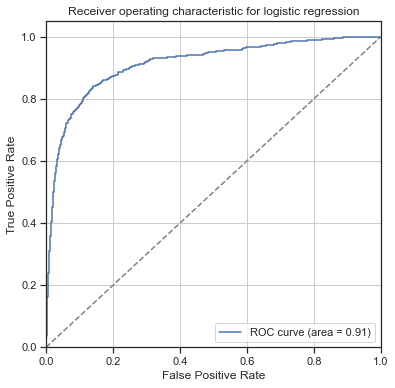

In [543]:
preds_probs = lr_grid_search.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds_probs)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))

fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# ax.fill_between(fpr, tpr, alpha=0.4)
ax.plot([0, 1], [0, 1], color='gray', linestyle='--')

ax.set_xlim(0.0, 1.0)
ax.set_ylim(0.0, 1.05)
ax.grid()
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic for logistic regression')
ax.legend(loc="lower right")

Text(0.5, 1.0, 'Confusion matrix for logistic regression')

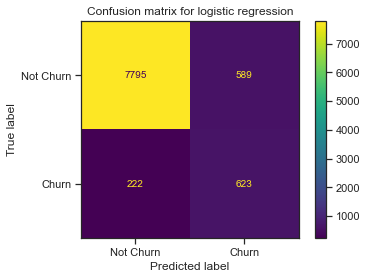

In [533]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(lr_grid_search, X_test, y_test,
                             display_labels=['Not Churn', 'Churn'])
disp.ax_.set_title('Confusion matrix for logistic regression')

https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html#sphx-glr-auto-examples-model-selection-plot-multi-metric-evaluation-py   画一个不同 threshold 下的 profit 的图

In [542]:
profit_score(preds, y_test)

187.67880810488683

In [539]:
# cm = confusion_matrix(y_test, preds)

# fig, ax = plt.subplots(figsize=(4, 4))
# ax.imshow(cm, cmap='Wistia')

# ax.set_xticks(np.arange(cm.shape[0]))
# ax.set_yticks(np.arange(cm.shape[1]))
# flag_labels = ['Not Churn', 'Churn']
# ax.set_xticklabels(flag_labels)
# ax.set_yticklabels(flag_labels)
# ax.set_ylabel('True')
# ax.set_xlabel('Predicted')
# ax.set_title('Confusion matrix for logistic regression')

# cell_names = [['TN','FP'], ['FN', 'TP']]
# for i in range(len(flag_labels)):
#     for j in range(len(flag_labels)):
#         text = ax.text(j, i, cell_names[i][j] + ' = ' + str(cm[i, j]),
#                        ha="center", va="center")

## SVM

In [105]:
from sklearn import svm 
from sklearn.model_selection import GridSearchCV   #Perforing grid search
svm_linear = svm.SVC(kernel='linear')

grid_search = GridSearchCV(estimator=svm_linear,
                           cv=5,
                           n_jobs=-1)

TypeError: __init__() missing 1 required positional argument: 'param_grid'

In [ ]:
grid_search.fit(X_train_res, y_train_res)

## Random Forest

https://www.cnblogs.com/pinard/p/6160412.html

In [544]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [551]:
# params = {
#     'max_depth': range(10,21,2), 
#     'min_samples_split': range(50,201,20)
#     }

rf_params1 = {
    'n_estimators': range(290, 401, 20)
}

In [552]:
%%time
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(max_features='sqrt', random_state=rdn_seed), 
                           param_grid=rf_params1, 
                           scoring=make_scorer(profit_score),
                           cv=4,
                           n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train_res, y_train_res)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed: 11.7min finished


Wall time: 14min 14s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_features='sqrt',
                                              random_state=0),
             n_jobs=-1, param_grid={'n_estimators': range(250, 401, 20)},
             scoring=make_scorer(profit_score), verbose=1)

In [553]:
rf_grid_search.cv_results_

{'mean_fit_time': array([130.64069593, 140.48682314, 151.30609107, 163.61974776,
        172.98198307, 183.19111741, 199.07581669, 198.23905516]),
 'std_fit_time': array([1.08008168, 1.58805063, 0.84840542, 1.18751702, 1.60273327,
        1.95764606, 3.27518982, 1.46270466]),
 'mean_score_time': array([2.0853563 , 1.96174783, 2.12190521, 2.31448215, 2.31605226,
        2.52374673, 2.37038386, 1.84880322]),
 'std_score_time': array([0.16533534, 0.02844323, 0.06848448, 0.16615647, 0.0509644 ,
        0.10009502, 0.10746988, 0.157178  ]),
 'param_n_estimators': masked_array(data=[250, 270, 290, 310, 330, 350, 370, 390],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 250},
  {'n_estimators': 270},
  {'n_estimators': 290},
  {'n_estimators': 310},
  {'n_estimators': 330},
  {'n_estimators': 350},
  {'n_estimators': 370},
  {'n_estimators': 390}],
 'split0_test_score': array([1448.6

In [554]:
rf_grid_search.best_params_, rf_grid_search.best_score_

({'n_estimators': 350}, 1567.26022504244)

In [584]:
rf_params2 = {
    'max_depth': range(60, 81, 5),
}

In [585]:
%%time
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(n_estimators=350, max_features='sqrt', random_state=rdn_seed, oob_score=True), 
                           param_grid=rf_params2, 
                           scoring=make_scorer(profit_score),
                           cv=4,
                           n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train_res, y_train_res)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  9.2min finished


Wall time: 11min 53s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_features='sqrt',
                                              n_estimators=350, oob_score=True,
                                              random_state=0),
             n_jobs=-1, param_grid={'max_depth': range(60, 81, 5)},
             scoring=make_scorer(profit_score), verbose=1)

In [586]:
rf_grid_search.cv_results_

{'mean_fit_time': array([201.17567831, 200.6609233 , 197.25129431, 198.20979291,
        140.37784749]),
 'std_fit_time': array([2.30874847, 2.62141541, 3.62559856, 1.35048774, 0.52367509]),
 'mean_score_time': array([3.80785084, 3.79053003, 3.51881099, 2.89350748, 1.82991421]),
 'std_score_time': array([0.51955136, 0.71253431, 0.64427857, 0.22307643, 0.2294722 ]),
 'param_max_depth': masked_array(data=[60, 65, 70, 75, 80],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 60},
  {'max_depth': 65},
  {'max_depth': 70},
  {'max_depth': 75},
  {'max_depth': 80}],
 'split0_test_score': array([1448.98025986, 1449.95007748, 1449.24758255, 1449.75114078,
        1449.84439266]),
 'split1_test_score': array([1605.74233401, 1605.83558589, 1606.14020741, 1606.23345929,
        1606.23345929]),
 'split2_test_score': array([1604.22780116, 1604.32105859, 1604.41431603, 1604.41431603,
        1604.41431603]),
 'spli

In [592]:
rf_params3 = {
    'max_features': range(1, 12, 2),
}

In [593]:
%%time
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(n_estimators=350, max_depth=60, random_state=rdn_seed, oob_score=True), 
                           param_grid=rf_params3, 
                           scoring=make_scorer(profit_score),
                           cv=4,
                           n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train_res, y_train_res)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  7.8min finished


Wall time: 8min 48s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=60, n_estimators=350,
                                              oob_score=True, random_state=0),
             n_jobs=-1, param_grid={'max_features': range(1, 12, 2)},
             scoring=make_scorer(profit_score), verbose=1)

In [594]:
rf_grid_search.cv_results_

{'mean_fit_time': array([ 49.12675273,  82.7441678 , 115.59289098, 156.94766343,
        196.93881589, 207.70676196]),
 'std_fit_time': array([1.11993046, 1.26461412, 1.96337321, 1.99793984, 2.2892495 ,
        1.21320689]),
 'mean_score_time': array([3.76582867, 3.02629167, 2.84812582, 2.81839043, 2.57087016,
        1.75703692]),
 'std_score_time': array([0.34325276, 0.1128563 , 0.19193782, 0.31122332, 0.27521186,
        0.19458678]),
 'param_max_features': masked_array(data=[1, 3, 5, 7, 9, 11],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_features': 1},
  {'max_features': 3},
  {'max_features': 5},
  {'max_features': 7},
  {'max_features': 9},
  {'max_features': 11}],
 'split0_test_score': array([1487.4807188 , 1488.76137919, 1467.51867207, 1455.79383955,
        1448.98025986, 1441.73771963]),
 'split1_test_score': array([1595.35410538, 1600.47050662, 1604.18813923, 1603.54159733,
        1605.

In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(oob_score=True, random_state=42)
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv=4,
                           scoring='roc_auc',
                           n_jobs=-1, verbose=1)

In [127]:
X_train_res.shape

(58438, 90)

In [128]:
%%time
grid_search.fit(X_train_res, y_train_res)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  6.2min finished


Wall time: 7min 37s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20],
                         'n_estimators': [175, 200, 225]},
             scoring='roc_auc', verbose=1)

In [129]:
grid_search.best_score_

0.990600147863345

In [130]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, n_estimators=225, oob_score=True,
                       random_state=42)

In [193]:
from sklearn.ensemble import RandomForestClassifier

RF2=RandomForestClassifier(criterion='gini', max_depth=20,
                                      min_samples_split=50, min_samples_leaf=1, 
                                      min_weight_fraction_leaf=0.0, max_features='auto', 
                                      max_leaf_nodes=None, min_impurity_split=0,
                                      bootstrap=True, oob_score=False, n_jobs=-1, 
                                      random_state=42, verbose=1, warm_start=False, 
                                      class_weight="balanced_subsample")
RF2.fit(X_train_res, y_train_res)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.2s finished


RandomForestClassifier(class_weight='balanced_subsample', max_depth=20,
                       min_impurity_split=0, min_samples_split=50, n_jobs=-1,
                       random_state=42, verbose=1)

In [194]:
# from sklearn.model_selection import cross_val_score
# scores = cross_val_score(RF2, X_train_res, y_train_res, scoring = 'roc_auc')
# print("Scores:", scores)

In [195]:
# print("Mean:", scores.mean())

In [196]:
# print("Standard Deviation:", scores.std())

In [197]:
predictions_train_res = RF2.predict(X_train_res)
print(classification_report(y_train_res, predictions_train_res))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.97      0.96      0.97     29219
           1       0.96      0.97      0.97     29219

    accuracy                           0.97     58438
   macro avg       0.97      0.97      0.97     58438
weighted avg       0.97      0.97      0.97     58438



[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished


In [198]:
predictions = RF2.predict(X_test)
print(classification_report(y_test, predictions))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


              precision    recall  f1-score   support

           0       0.97      0.94      0.96      7290
           1       0.54      0.73      0.62       690

    accuracy                           0.92      7980
   macro avg       0.76      0.84      0.79      7980
weighted avg       0.94      0.92      0.93      7980



In [199]:


def Performance(Model,Y,X):
    # Perforamnce of the model
    fpr, tpr, _ = roc_curve(Y, Model.predict_proba(X)[:,1])
    AUC  = auc(fpr, tpr)
    print ('the AUC is : %0.4f' %  AUC)
    plt.figure(figsize = (8,8))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % AUC)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


the AUC is : 0.9282


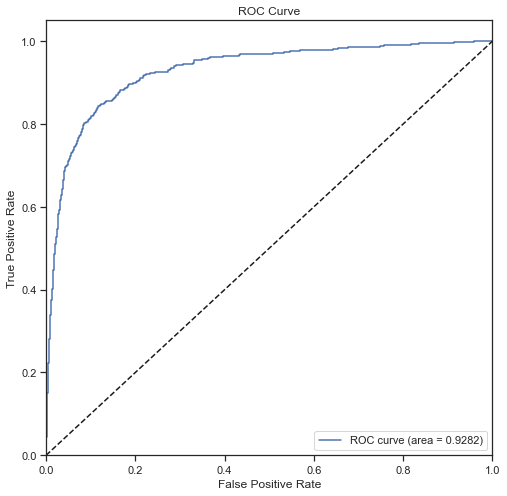

In [200]:
preds_probs_RFC=RF2.predict_proba(X_test)[:,1]
Performance(Model=RF2,Y=y_test,X=X_test)

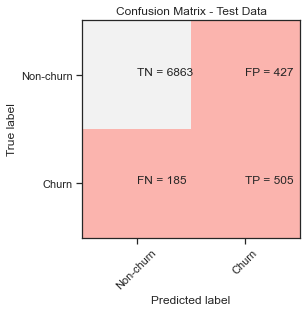

In [201]:
cm = confusion_matrix(y_test, predictions)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Non-churn','Churn']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
plt.show()

In [114]:
importances = RF2.feature_importances_
col_names =  X_train_res.columns

sorted_feature_importance = pd.DataFrame(sorted(zip(importanc es, list(col_names)), reverse=True),columns={'colName','value'})
sorted_feature_importance

,value,colName
0,0.074225,last_day_rech_amt_8
1,0.060167,total_ic_mou_8over7
2,0.054844,max_rech_amt_8
3,0.051159,loc_ic_t2m_mou_8over7
4,0.042847,loc_ic_t2f_mou_8
5,0.036437,total_og_mou_8over7
6,0.035397,offnet_mou_8over7
7,0.034209,roam_og_mou_8
8,0.032210,offnet_mou_8
9,0.030967,loc_ic_t2m_mou_7


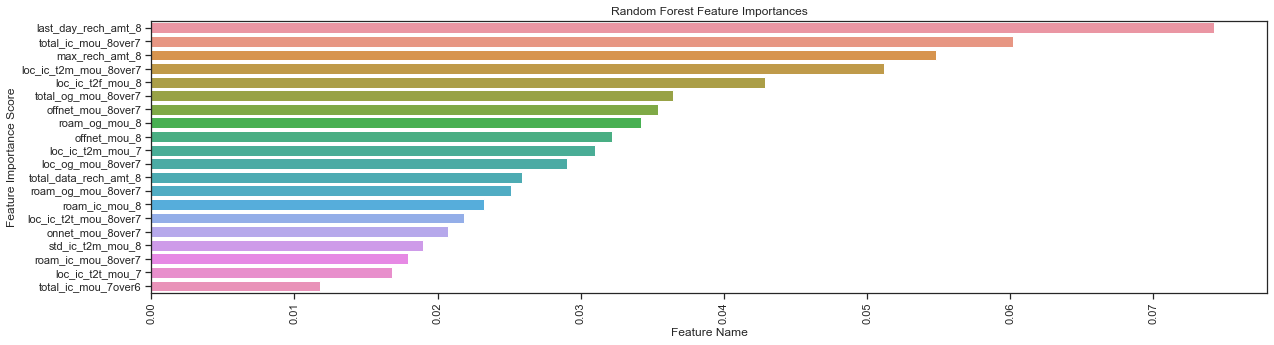

In [115]:
plt.figure(figsize = (20,5))
sns.barplot(y='colName', x='value',data=sorted_feature_importance[0:20])
plt.ylabel('Feature Importance Score')
plt.xlabel('Feature Name')
plt.xticks(rotation = 90)
plt.title('Random Forest Feature Importances')
plt.show()